In [1]:
import os
import numpy as np
import pandas as pd
# from scipy import stats
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Showing Histogram Distribution 

https://saturncloud.io/blog/fitting-a-weibull-distribution-using-scipy/

https://saturncloud.io/blog/scipy-weibull-parameter-confidence-intervals-a-guide-for-data-scientists/

#### Function that don't work with numpy.float64

In [2]:
mechanical = pd.read_csv('Mechanical_FiltAnalysis.csv')#,sep = ';')
sulfuric = pd.read_csv('Sulfuric_FiltAnalysis.csv')
nitric = pd.read_csv('Nitric_FiltAnalysis.csv')
xps = pd.read_csv('Pink_FiltAnalysis.csv')
pet = pd.read_csv('Green_FiltAnalysis.csv')


titles = ['Mechanical', 'Sulfuric', 'Nitric', 'EX-PS', 'R-PET']
# titles = ['Mechanical', 'Nitric', 'Sulfuric', 'PET', 'XPS']

In [3]:
def computeCI_WeibullFit(data, confidence_level, n_bootstrap_samples):
    # Create an empty list to store bootstrap samples of the parameters
    bootstrap_samples = []
    # Perform bootstrapping to estimate confidence intervals
    # Number of bootstrap samples (increase for better accuracy)
    for _ in range(n_bootstrap_samples):
        # Generate a random bootstrap sample with replacement
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Fit the bootstrap sample to a Weibull distribution
        shape_boot, loc_boot, scale_boot = stats.weibull_min.fit(bootstrap_sample, floc=0)
        # Append the estimated parameters to the list
        bootstrap_samples.append((shape_boot, scale_boot))
    # Calculate quantiles for the shape and scale parameters
    shape_ci = mstats.mquantiles([sample[0] for sample in bootstrap_samples], [0.025, 0.975])
    scale_ci = mstats.mquantiles([sample[1] for sample in bootstrap_samples], [0.025, 0.975])
    return shape_ci, scale_ci

# # Confidence level
# confidence_level = 0.95
# data =mechanical
# shape_ci, scale_ci = computeCI_WeibullFit(data, 0.95, 100)
# print(f"95% Confidence Interval for Shape Parameter: ({shape_ci[0]:.4f}, {shape_ci[1]:.4f})")
# print(f"95% Confidence Interval for Scale Parameter: ({scale_ci[0]:.4f}, {scale_ci[1]:.4f})")

Conversion tick labels function: [X] um3 --> [X / e9] mm3

In [80]:
# Define a function to format the tick labels
def custom_formatter_cub(x, pos):
    # Convert values from 1e8 to 1.0 mm3
    #return f'{x / 1e9:.2f} mm3'
    return f'{x / 1e9:.2f}'# mm3'

def custom_formatter_quad(x, pos):
    # Convert values from 1e8 to 1.0 mm3
    #return f'{x / 1e9:.2f} mm3'
    return f'{x / 1e6:.2f}'# mm3'

def scientific_to_decimal1(x, pos):
    return f'{x / 1e-5 : .3f}'# mm3' 

def scientific_to_decimal2(x, pos):
    return f'{x : .7f}'# mm3

### Pore Volumes histograms

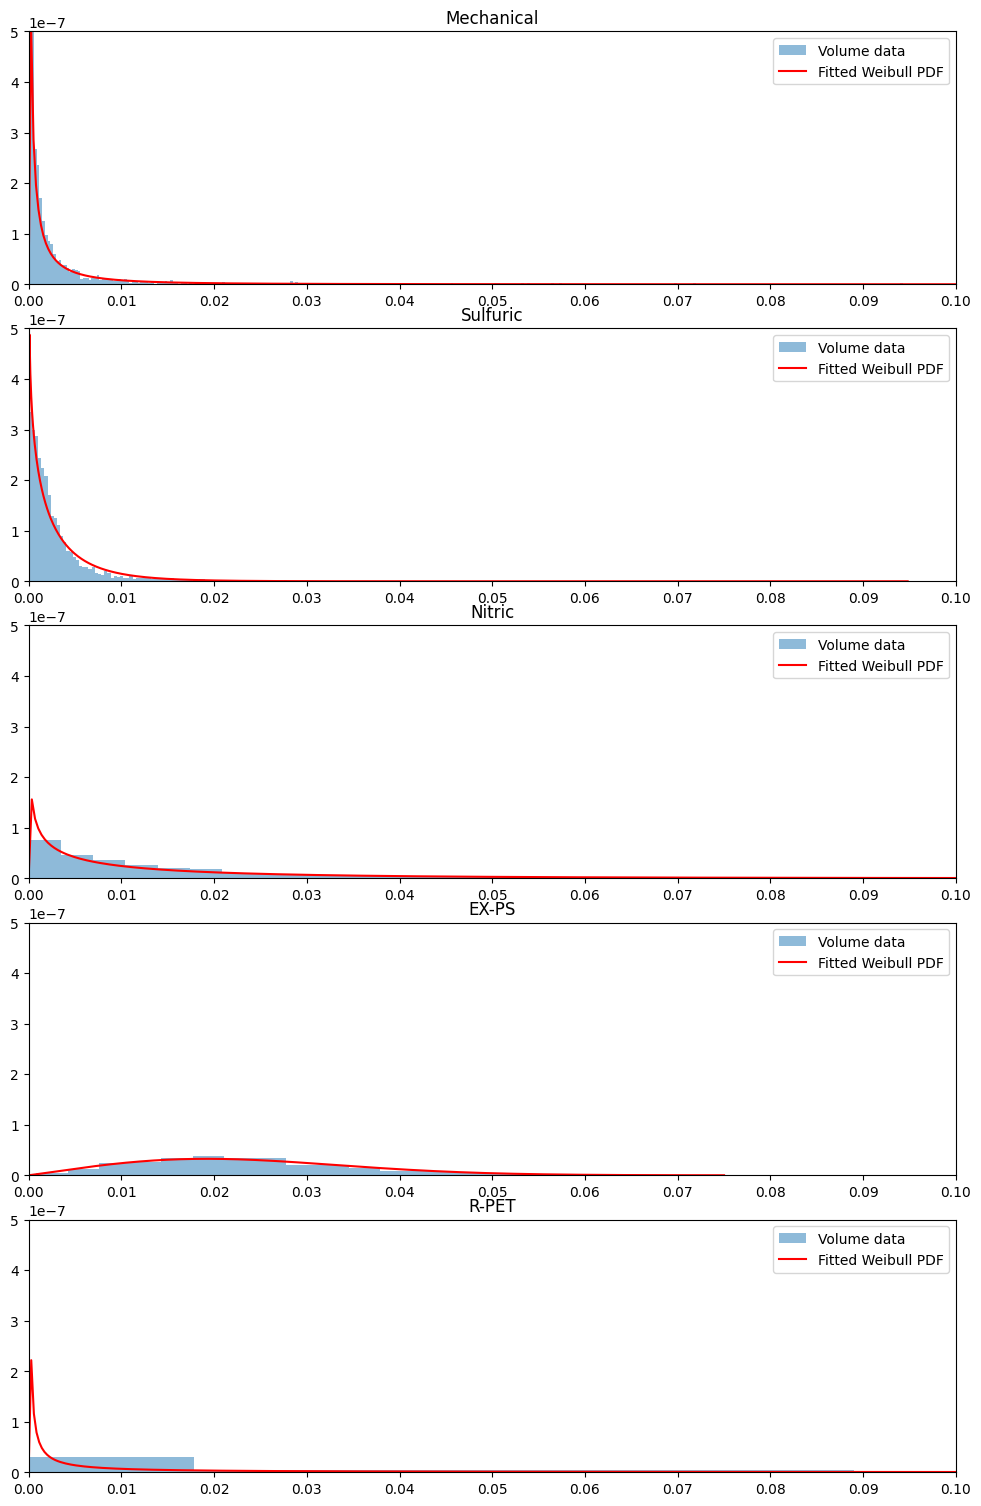

In [25]:
import matplotlib.gridspec as gridspec
volume_ci_list = []
volume_loc_est = np.zeros(5)
volume_shape_est = np.zeros(5)
volume_scale_est = np.zeros(5)
fig, ax = plt.subplots(figsize = (10,15), nrows=5, ncols =1)#, tight_layout=True) # sharey=True, sharex = True,
# fig = plt.figure(figsize = (10,15))
# plt.subplots(figsize = (10,15), nrows=5, ncols =1)#, tight_layout=True) # sharey=True, sharex = True,
fig.tight_layout()
# gs = gridspec.GridSpec(5, 1, hspace=0)  # Create a 5x1 grid with no vertical space
for j in range(5):
    # ax[j] = plt.subplot(gs[j])
    if j == 0:
        data = mechanical['Volume3d']
    elif j == 1:
        data = sulfuric['Volume3d']
    elif j == 2:
        data = nitric['Volume3d']
    elif j == 3:
        data = xps['Volume3d']
    elif j == 4:
        data = pet['Volume3d']
    # Fit the Weibull distribution to the data
    shape, loc, scale = weibull_min.fit(data, loc=0)
    # Plot the histogram of the original data
    ax[j].hist(data, density=True, bins='auto', alpha=0.5, label='Volume Data')
    # # Plot average
    # ax[j].axvline(data.mean(), color='k', linestyle='dashed', linewidth=1)
    # Generate x-values for the PDF plot
    x = np.linspace(0, np.max(data), 1000)
    # Plot the PDF of the fitted Weibull distribution
    ax[j].plot(x, weibull_min.pdf(x, shape, loc, scale), 'r-', label='Fitted Weibull PDF')
    ax[j].set_xlim(0.0, 1e8)
    ax[j].set_ylim(0.0, 0.5e-6)
    ax[j].set_title(titles[j]); # + ' pore volumes');
    ax[j].legend(['Volume data','Fitted Weibull PDF'])
    # # Set the tick locator and formatter for the x-axis
    ax[j].xaxis.set_major_locator(MultipleLocator(base=1e7))  # Adjust the base to fit your data
    ax[j].xaxis.set_major_formatter(FuncFormatter(custom_formatter_cub))
    volume_loc_est[j] = loc
    volume_shape_est[j] = shape
    volume_scale_est[j] = scale
    volume_shape_ci, volume_scale_ci = computeCI_WeibullFit(data, 0.95, 100)
    volume_ci_list.append((volume_shape_ci, volume_scale_ci))


# fig.savefig('tannin-foams-porevolume.tif')

### Pore Equivalent Diameter histograms

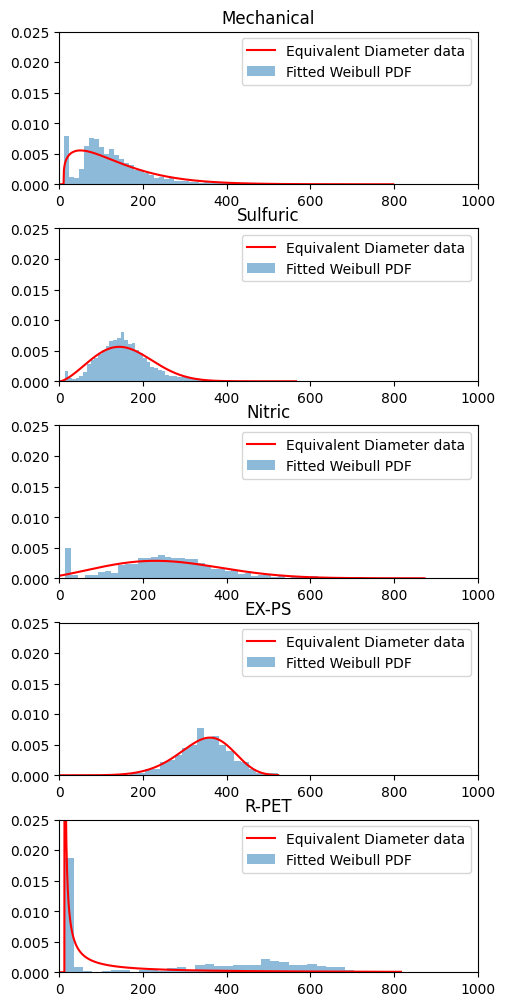

In [21]:
from scipy import stats
eqDiam_ci_list = []
eqDiam_loc_est = np.zeros(5)
eqDiam_shape_est = np.zeros(5)
eqDiam_scale_est = np.zeros(5)
eqDiam_scale_est = np.zeros(5)
# 10, 15 -->
fig, ax = plt.subplots(figsize = (5,10), nrows=5, ncols =1, tight_layout=True) # sharey=True, sharex = True,
fig.tight_layout()
for j in range(5):
    if j == 0:
        data = mechanical['EqDiameter']
    elif j == 1:
        data = sulfuric['EqDiameter']
    elif j == 2:
        data = nitric['EqDiameter']
    elif j == 3:
        data = xps['EqDiameter']
    elif j == 4:
        data = pet['EqDiameter']
    # Fit the Weibull distribution to the data
    shape, loc, scale = weibull_min.fit(data, loc=0)
    # Generate random numbers from the fitted distribution
    random_numbers = weibull_min.rvs(shape, loc, scale, size=1000)
    # Plot the histogram of the original data
    if j == 4 or j == 2:
        # Method 1 - Square Root Rule
        num_bins = int(np.sqrt(len(data)))
        # Method 2 - Sturges' Formula
        # num_bins = int(np.ceil(np.log2(len(data)) + 1))
        # Method 3 - Scott's Rule
        # bin_width = 3.5 * np.std(data) / (len(data) ** (1/3))
        # num_bins = int(np.ceil((max(data) - min(data)) / bin_width))
        # # Method 4 - Freedman-Diaconis Rule
        # iqr = np.percentile(data, 75) - np.percentile(data, 25)
        # bin_width = 2 * iqr / (len(data) ** (1/3))
        # num_bins = int(np.ceil((max(data) - min(data)) / bin_width))
        # print(num_bins)
        ax[j].hist(data, density=True, bins=num_bins*2, alpha=0.5) #, label='Equivalent diameter Data')
    else:
        ax[j].hist(data, density=True, bins='auto', alpha=0.5) #, label='Equivalent diameter Data')
    # # Plot average
    # ax[j].axvline(data.mean(), color='k', linestyle='dashed', linewidth=1)
    # Generate x-values for the PDF plot
    x = np.linspace(0, np.max(data), 1000)
    # Plot the PDF of the fitted Weibull distribution
    ax[j].plot(x, weibull_min.pdf(x, shape, loc, scale), 'r-') #, label='Fitted Weibull PDF')
    ax[j].set_xlim(0.0, 1000)
    ax[j].set_ylim(0.0, 0.025)
    ax[j].set_title(titles[j]);
    ax[j].legend(['Equivalent Diameter data', 'Fitted Weibull PDF'])
    eqDiam_loc_est[j] = loc
    eqDiam_shape_est[j] = shape
    eqDiam_scale_est[j] = scale
    eqDiam_shape_ci, eqDiam_scale_ci = computeCI_WeibullFit(data, 0.95, 100)
    eqDiam_ci_list.append((eqDiam_shape_ci, eqDiam_scale_ci))

# fig.savefig('tannin-foams-eqDiameter.tif')

### Pore Surface Area histograms

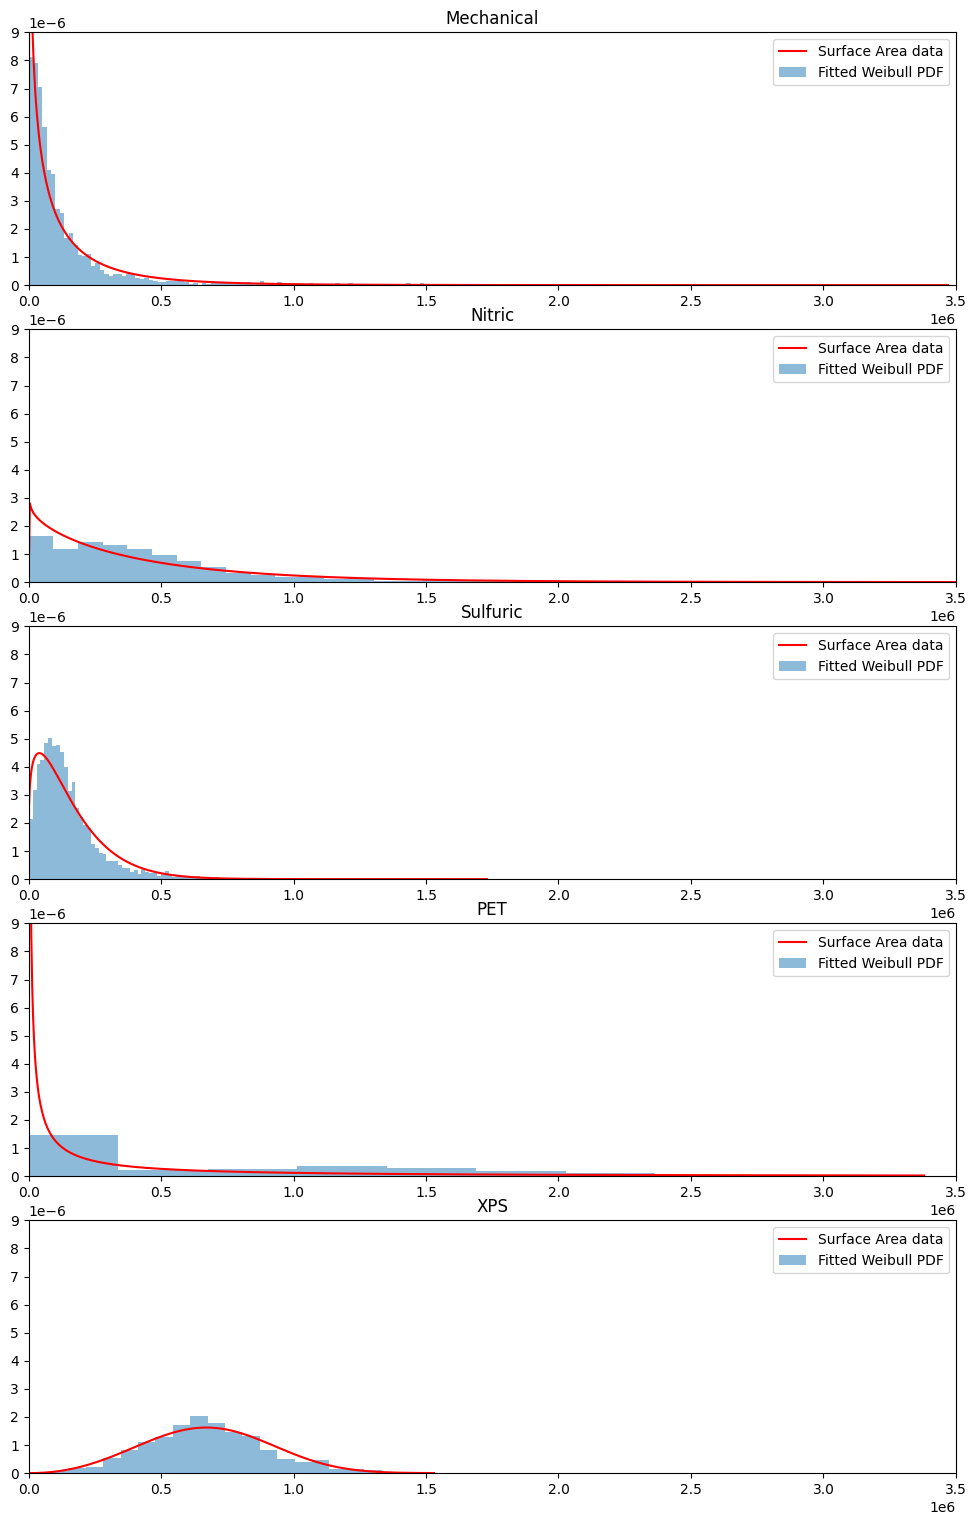

In [167]:
surfArea_ci_list = []
surfArea_loc_est = np.zeros(5)
surfArea_shape_est = np.zeros(5)
surfArea_scale_est = np.zeros(5)
fig, ax = plt.subplots(figsize = (10,15), nrows=5, ncols =1)#, tight_layout=True) # sharey=True, sharex = True,
fig.tight_layout()
for j in range(5):
    if j == 0:
        data = mechanical['VoxelFaceArea']
    elif j == 1:
        data = nitric['VoxelFaceArea']
    elif j == 2:
        data = sulfuric['VoxelFaceArea']
    elif j == 3:
        data = pet['VoxelFaceArea']
    elif j == 4:
        data = xps['VoxelFaceArea']
    # Fit the Weibull distribution to the data
    shape, loc, scale = weibull_min.fit(data, loc=0)
    # Generate random numbers from the fitted distribution
    random_numbers = weibull_min.rvs(shape, loc, scale, size=1000)
    # Plot the histogram of the original data
    ax[j].hist(data, density=True, bins='auto', alpha=0.5) #, label='Equivalent diameter Data')
    # # Plot average
    # ax[j].axvline(data.mean(), color='k', linestyle='dashed', linewidth=1)
    # Generate x-values for the PDF plot
    x = np.linspace(0, np.max(data), 1000)
    # Plot the PDF of the fitted Weibull distribution
    ax[j].plot(x, weibull_min.pdf(x, shape, loc, scale), 'r-') #, label='Fitted Weibull PDF')
    ax[j].set_xlim(0.0, 3.5e6)
    ax[j].set_ylim(0.0, 9e-6)
    ax[j].set_title(titles[j]);
    ax[j].legend(['Surface Area data','Fitted Weibull PDF'])
    surfArea_loc_est[j] = loc
    surfArea_shape_est[j] = shape
    surfArea_scale_est[j] = scale
    surfArea_shape_ci, surfArea_scale_ci = computeCI_WeibullFit(data, 0.95, 100)
    surfArea_ci_list.append((surfArea_shape_ci, surfArea_scale_ci))
fig.savefig('tannin-foams-surfaceArea.tif')

### Pore Anisotropy, Elongation, Flatness histograms 

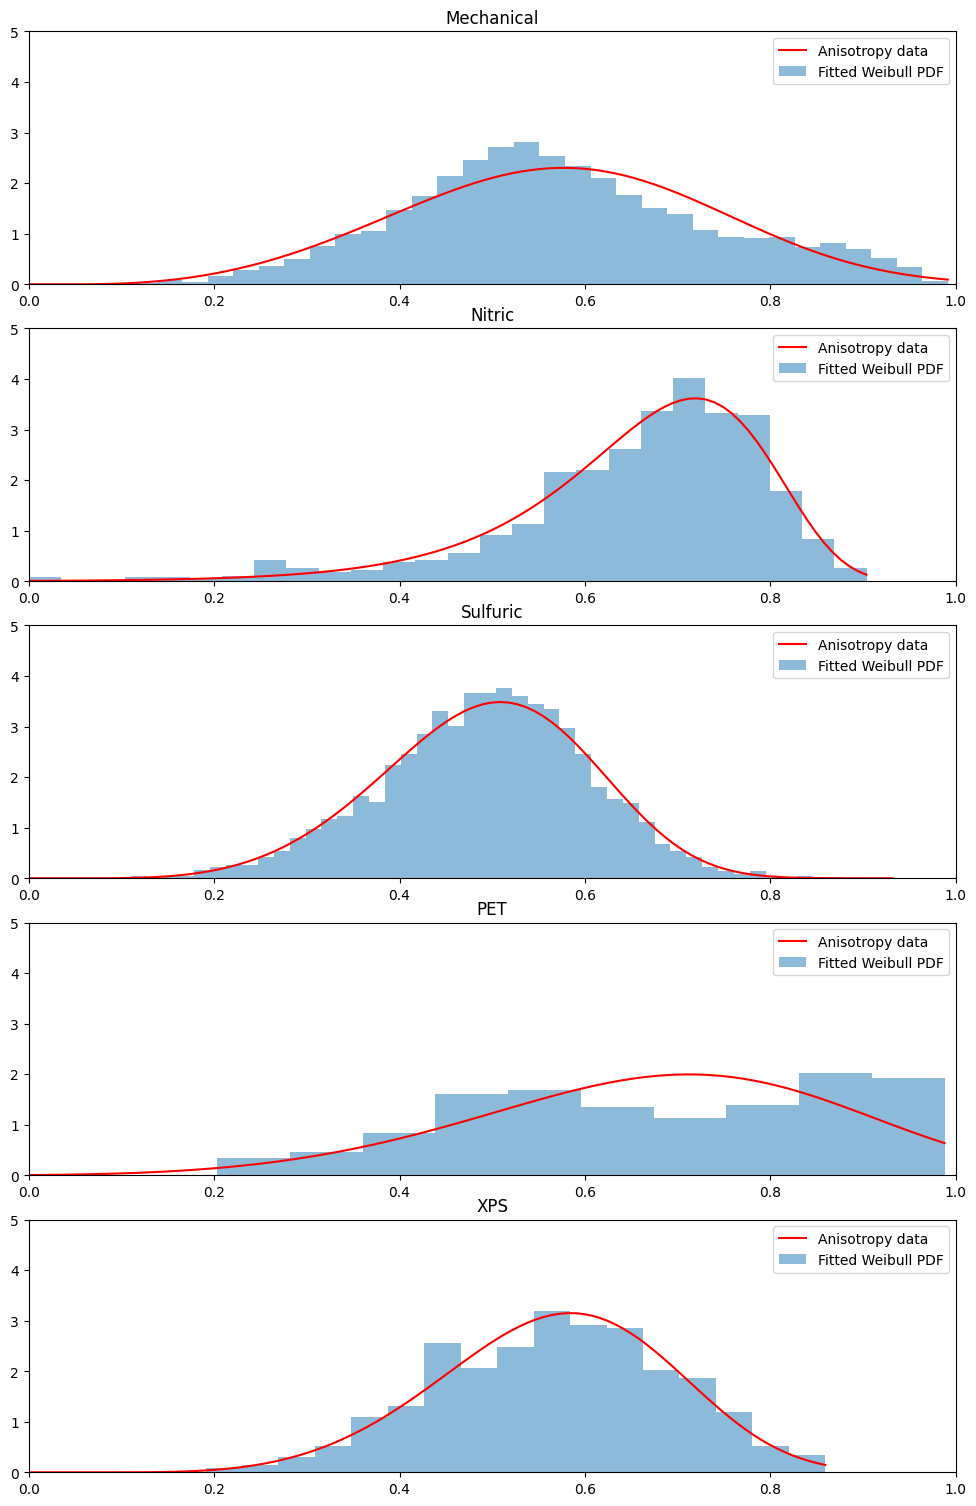

In [207]:
anis_ci_list = []
anis_loc_est = np.zeros(5)
anis_shape_est = np.zeros(5)
anis_scale_est = np.zeros(5)
fig, ax = plt.subplots(figsize = (10,15), nrows=5, ncols =1)#, tight_layout=True) # sharey=True, sharex = True,
fig.tight_layout()
for j in range(5):
    if j == 0:
        data = mechanical['Anisotropy']
    elif j == 1:
        data = nitric['Anisotropy']
    elif j == 2:
        data = sulfuric['Anisotropy']
    elif j == 3:
        data = pet['Anisotropy']
    elif j == 4:
        data = xps['Anisotropy']
    # Fit the Weibull distribution to the data
    shape, loc, scale = weibull_min.fit(data, loc=0)
    # Generate random numbers from the fitted distribution
    random_numbers = weibull_min.rvs(shape, loc, scale, size=1000)
    # Plot the histogram of the original data
    ax[j].hist(data, density=True, bins='auto', alpha=0.5) #, label='Equivalent diameter Data')
    # Generate x-values for the PDF plot
    x = np.linspace(0, np.max(data), 100)
    # Plot the PDF of the fitted Weibull distribution
    ax[j].plot(x, weibull_min.pdf(x, shape, loc, scale), 'r-') #, label='Fitted Weibull PDF')
    ax[j].set_xlim(0.0, 1.0)
    ax[j].set_ylim(0.0, 5.0)
    ax[j].set_title(titles[j]);
    ax[j].legend(['Anisotropy data','Fitted Weibull PDF'])
    anis_loc_est[j] = loc
    anis_shape_est[j] = shape
    anis_scale_est[j] = scale
    anis_shape_ci, anis_scale_ci = computeCI_WeibullFit(data, 0.95, 100)
    anis_ci_list.append((anis_shape_ci, anis_scale_ci))
fig.savefig('tannin-foams-anysotropy.tif')

In [208]:
print(anis_scale_est)

[5.84572418e-01 3.22676152e+07 4.88376128e-01 8.91742207e-01
 5.32871426e-01]


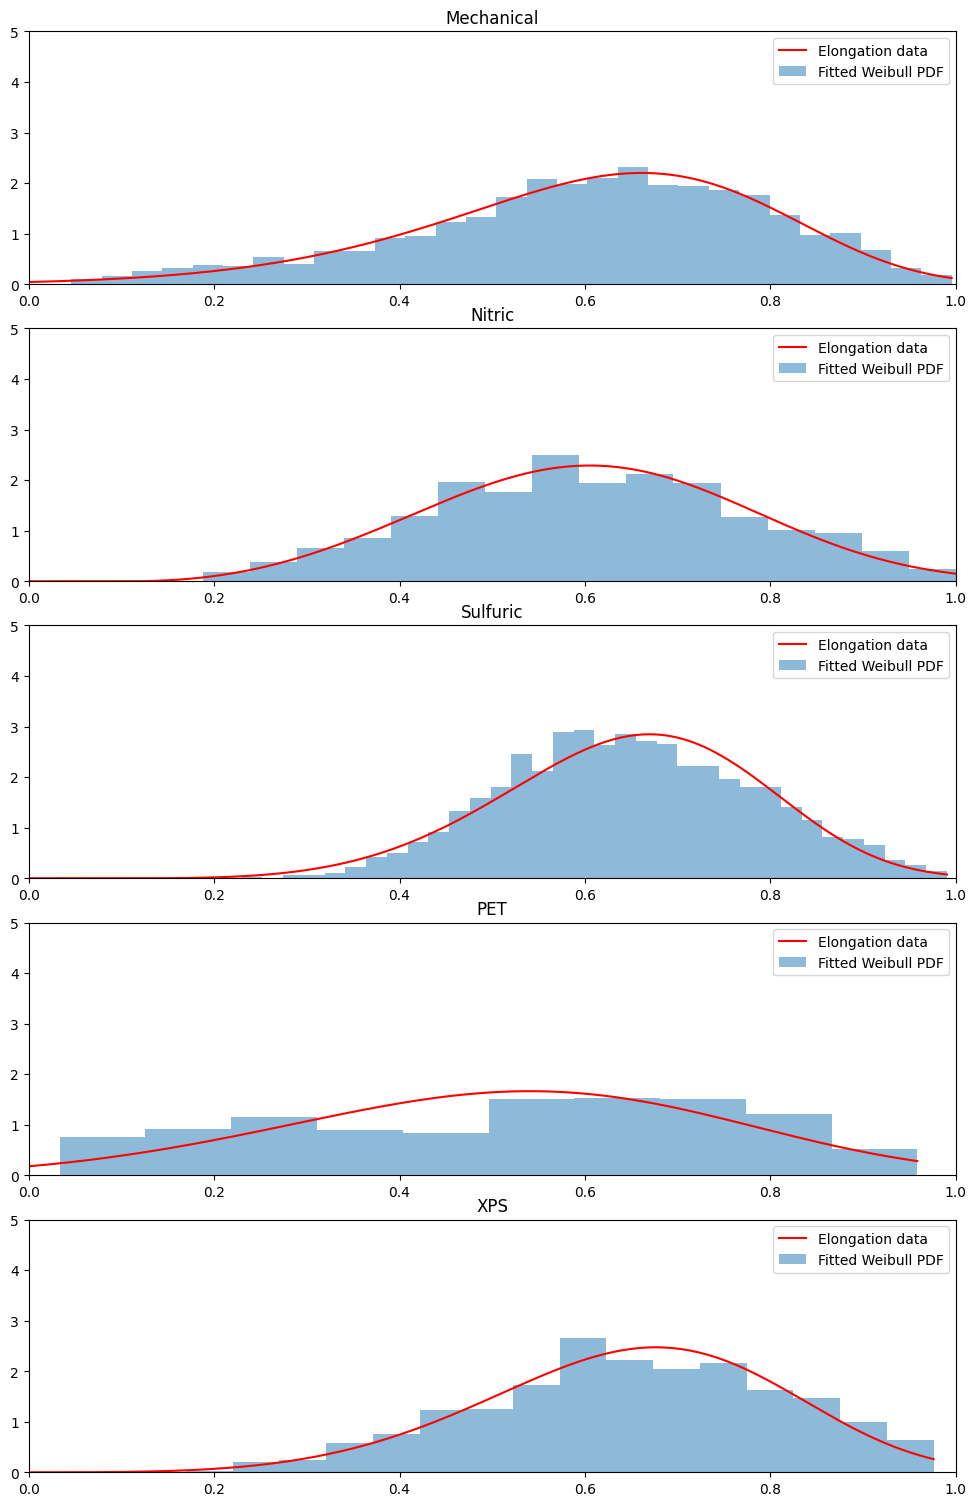

In [170]:
elong_ci_list = []
elong_loc_est = np.zeros(5)
elong_shape_est = np.zeros(5)
elong_scale_est = np.zeros(5)
fig, ax = plt.subplots(figsize = (10,15), nrows=5, ncols =1)
fig.tight_layout()
for j in range(5):
    if j == 0:
        data = mechanical['Elongation']
    elif j == 1:
        data = nitric['Elongation']
    elif j == 2:
        data = sulfuric['Elongation']
    elif j == 3:
        data = pet['Elongation']
    elif j == 4:
        data = xps['Elongation']
    # Fit the Weibull distribution to the data
    shape, loc, scale = weibull_min.fit(data, loc=0)
    # Generate random numbers from the fitted distribution
    random_numbers = weibull_min.rvs(shape, loc, scale, size=1000)
    # Plot the histogram of the original data
    ax[j].hist(data, density=True, bins='auto', alpha=0.5) #, label='Equivalent diameter Data')
    # Generate x-values for the PDF plot
    x = np.linspace(0, np.max(data), 1000)
    # Plot the PDF of the fitted Weibull distribution
    ax[j].plot(x, weibull_min.pdf(x, shape, loc, scale), 'r-') #, label='Fitted Weibull PDF')
    ax[j].set_xlim(0.0, 1.0)
    ax[j].set_ylim(0.0, 5.0)
    ax[j].set_title(titles[j]);
    ax[j].legend(['Elongation data', 'Fitted Weibull PDF'])
    elong_loc_est[j] = loc
    elong_shape_est[j] = shape
    elong_scale_est[j] = scale
    elong_shape_ci, elong_scale_ci = computeCI_WeibullFit(data, 0.95, 100)
    elong_ci_list.append((elong_shape_ci, elong_scale_ci))
fig.savefig('tannin-foams-elongation.tif')

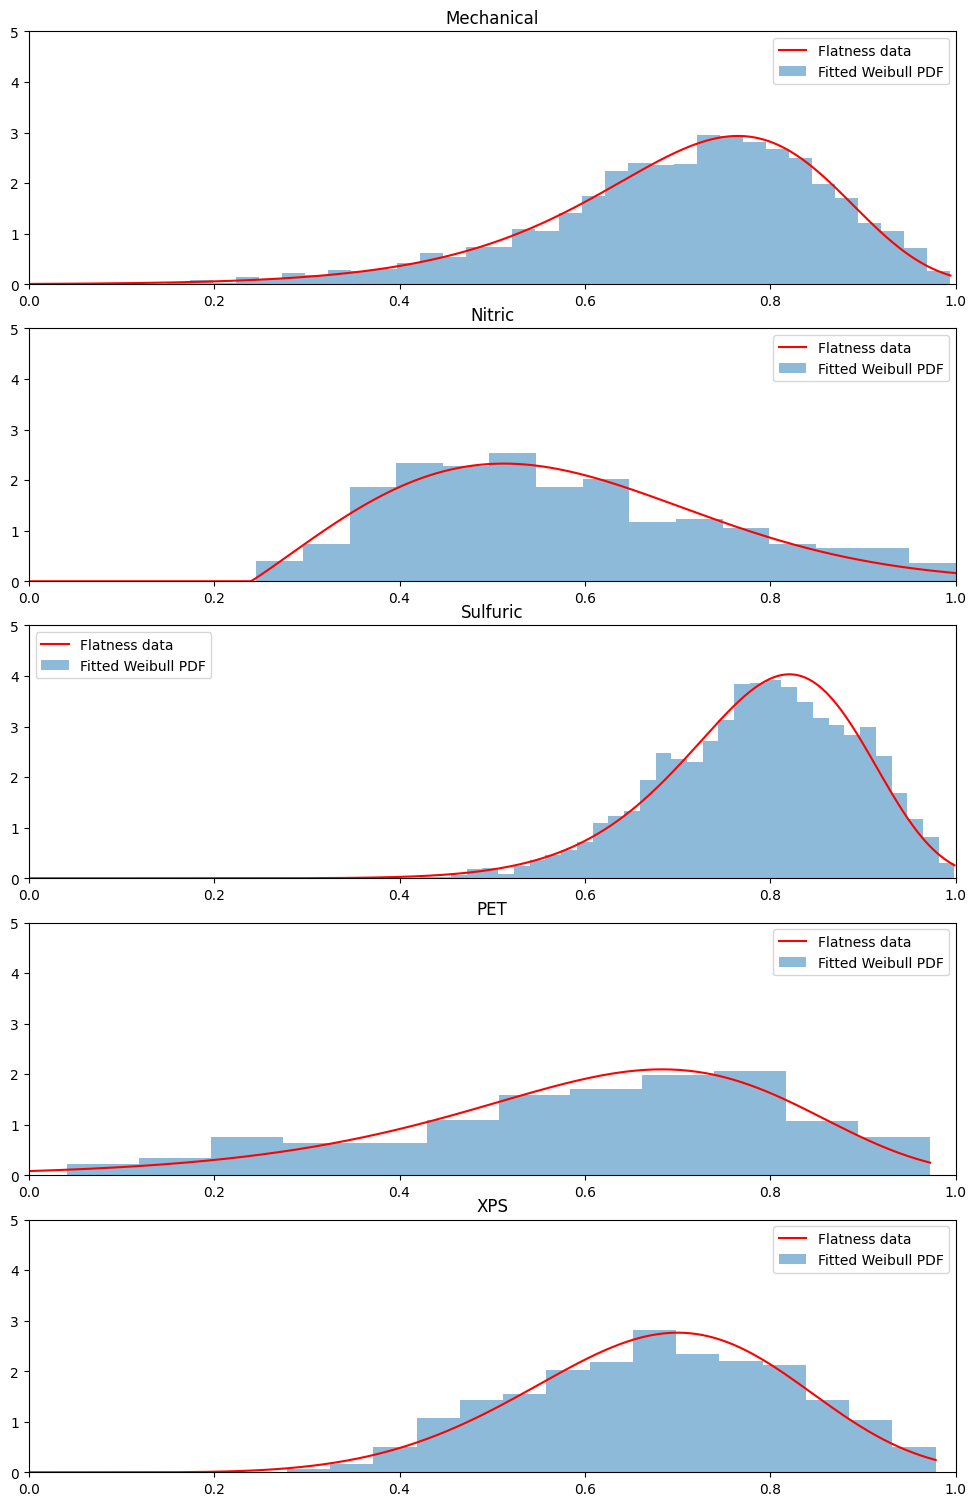

In [171]:
flatn_ci_list = []
flatn_loc_est = np.zeros(5)
flatn_shape_est = np.zeros(5)
flatn_scale_est = np.zeros(5)
fig, ax = plt.subplots(figsize = (10,15), nrows=5, ncols =1)
fig.tight_layout()
for j in range(5):
    if j == 0:
        data = mechanical['Flatness']
    elif j == 1:
        data = nitric['Flatness']
    elif j == 2:
        data = sulfuric['Flatness']
    elif j == 3:
        data = pet['Flatness']
    elif j == 4:
        data = xps['Flatness']
    # Fit the Weibull distribution to the data
    shape, loc, scale = weibull_min.fit(data, loc=0)
    # Generate random numbers from the fitted distribution
    random_numbers = weibull_min.rvs(shape, loc, scale, size=1000)
    # Plot the histogram of the original data
    ax[j].hist(data, density=True, bins='auto', alpha=0.5) #, label='Equivalent diameter Data')
    # Generate x-values for the PDF plot
    x = np.linspace(0, np.max(data), 1000)
    # Plot the PDF of the fitted Weibull distribution
    ax[j].plot(x, weibull_min.pdf(x, shape, loc, scale), 'r-') #, label='Fitted Weibull PDF')
    ax[j].set_xlim(0.0, 1.0)
    ax[j].set_ylim(0.0, 5.0)
    ax[j].set_title(titles[j]);
    ax[j].legend(['Flatness data','Fitted Weibull PDF'])
    flatn_loc_est[j] = loc
    flatn_shape_est[j] = shape
    flatn_scale_est[j] = scale
    flatn_shape_ci, flatn_scale_ci = computeCI_WeibullFit(data, 0.95, 100)
    flatn_ci_list.append((flatn_shape_ci, flatn_scale_ci))
fig.savefig('tannin-foams-flatness.tif')

## Fitted Weibull PDF - Parameters Estimation

### Volume PE Weibull fits

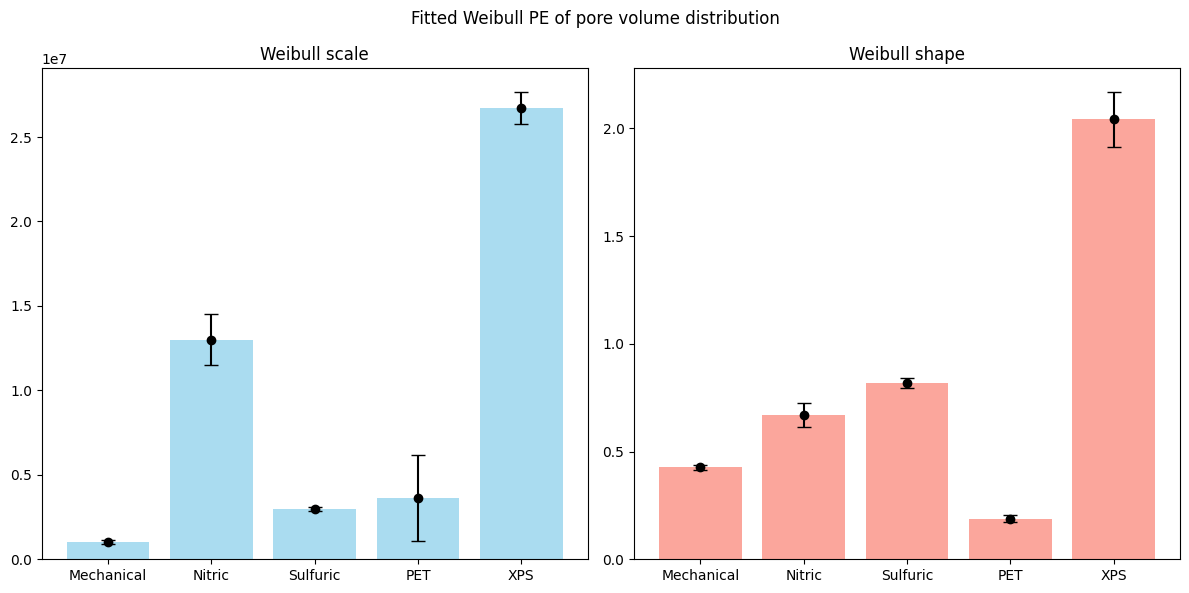

In [172]:
# Split the elements within each array
first_elements = [arr[0] for arr in volume_ci_list]
second_elements = [arr[1] for arr in volume_ci_list]

# Calculate error values from confidence intervals
errors_volshape = [(up - low) / 2 for low, up in first_elements]
errors_volscale = [(up - low) / 2 for low, up in second_elements]

# Create a figure with two horizontally arranged subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
# Subplot 1: Bar plot 1
axs[0].bar(titles, volume_scale_est, color='skyblue', alpha=0.7)
axs[0].errorbar(titles, volume_scale_est, yerr=errors_volscale, fmt='o', color='black', capsize=5, label='Confidence Interval')
axs[0].set_title('Weibull scale')

# Subplot 2: Bar plot 2
axs[1].bar(titles, volume_shape_est, color='salmon', alpha=0.7)
axs[1].errorbar(titles, volume_shape_est, yerr=errors_volshape, fmt='o', color='black', capsize=5, label='Confidence Interval')
axs[1].set_title('Weibull shape')

fig.suptitle('Fitted Weibull PE of pore volume distribution')
# Adjust spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

fig.savefig('tannin-foams-volume-bars.tif')

In [173]:
print(volume_scale_est)
print(errors_volscale)
print('x')
print(volume_shape_est)
print(errors_volshape)

[ 1007666.02012908 13008216.9246763   2960574.36608635  3606868.75493513
 26724596.75698308]
[109291.56394525582, 1498722.934229875, 130020.0379172212, 2544174.3161867373, 956908.45549866]
x
[0.42681617 0.66961381 0.81793614 0.18915541 2.04332964]
[0.01234706222504392, 0.057420673855798576, 0.022232093028691557, 0.016832594314626734, 0.12739562619892753]


### Surface Area PE Weibull fits

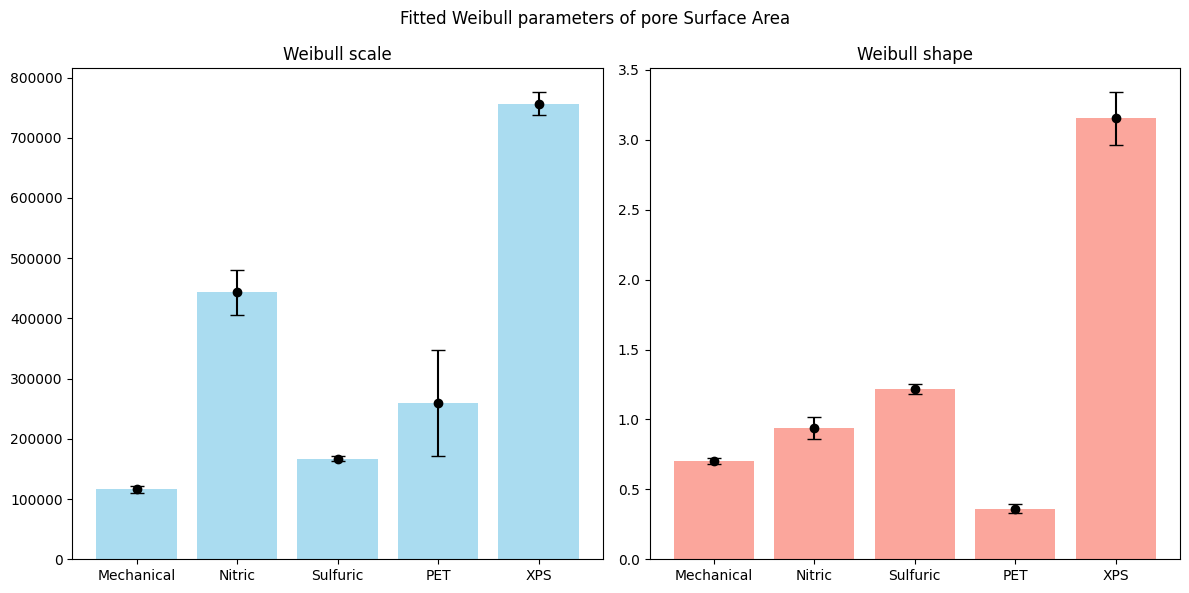

In [174]:
# Split the elements within each array
first_elements = [arr[0] for arr in surfArea_ci_list]
second_elements = [arr[1] for arr in surfArea_ci_list]

# Calculate error values from confidence intervals
errors_shape = [(up - low) / 2 for low, up in first_elements]
errors_scale = [(up - low) / 2 for low, up in second_elements]

data1 = surfArea_scale_est
data2 = surfArea_shape_est

# Create a figure with two horizontally arranged subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Subplot 1: Bar plot 1of SCALE
axs[0].bar(titles, data1, color='skyblue', alpha=0.7)
axs[0].errorbar(titles, data1, yerr=errors_scale, fmt='o', color='black', capsize=5, label='Confidence Interval')
axs[0].set_title('Weibull scale')

# Subplot 2: Bar plot of SHAPE
axs[1].bar(titles, data2, color='salmon', alpha=0.7)
axs[1].errorbar(titles, data2, yerr=errors_shape, fmt='o', color='black', capsize=5, label='Confidence Interval')
axs[1].set_title('Weibull shape')

fig.suptitle('Fitted Weibull parameters of pore Surface Area')
# Adjust spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

fig.savefig('tannin-foams-surfArea-bars.tif')

In [175]:
print(data1)
print(errors_scale)
print('x')
print(data2)
print(errors_shape)

[116107.61394751 443486.50291177 167000.86913221 260079.12778018
 756810.46535014]
[6213.723328274515, 37199.67606043737, 3955.956080047181, 88006.98724829248, 19611.599933591497]
x
[0.70459005 0.93755658 1.21454537 0.36076288 3.1539438 ]
[0.02128130145041396, 0.0792258257500561, 0.03572247568575171, 0.031101386009065368, 0.1904724483659983]


### Equivalent Diameter PE Weibull fits

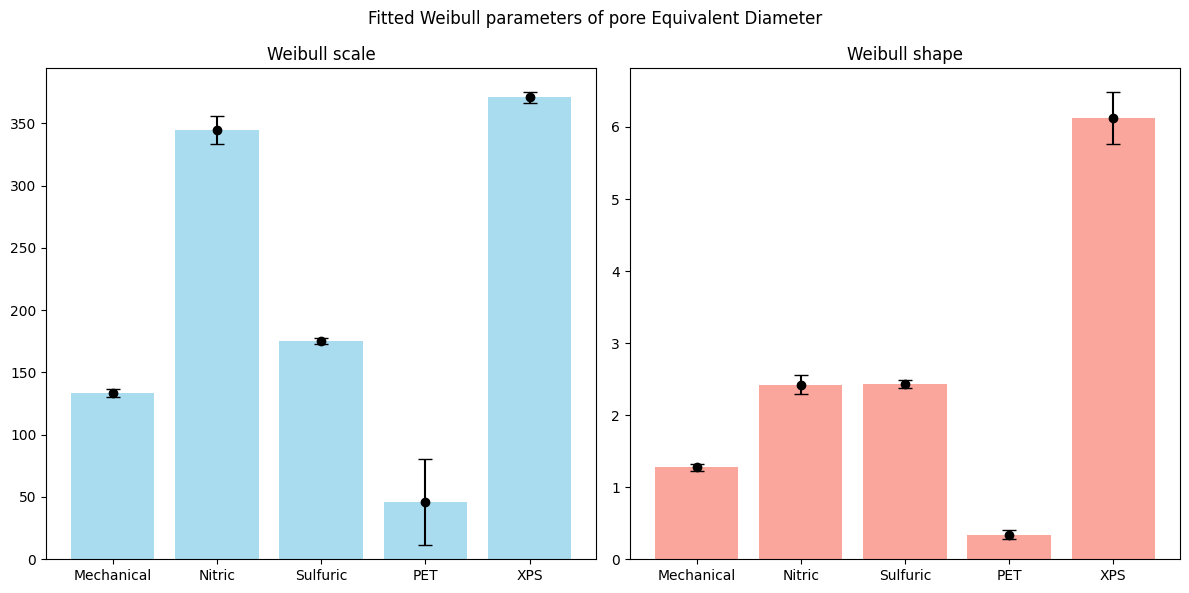

In [42]:
# Split the elements within each array
first_elements = [arr[0] for arr in eqDiam_ci_list]
second_elements = [arr[1] for arr in eqDiam_ci_list]

# Calculate error values from confidence intervals
errors_shape = [(up - low) / 2 for low, up in first_elements]
errors_scale = [(up - low) / 2 for low, up in second_elements]

data1 = eqDiam_scale_est
data2 = eqDiam_shape_est

# Create a figure with two horizontally arranged subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Subplot 1: Bar plot 1of SCALE
axs[0].bar(titles, data1, color='skyblue', alpha=0.7)
axs[0].errorbar(titles, data1, yerr=errors_scale, fmt='o', color='black', capsize=5, label='Confidence Interval')
axs[0].set_title('Weibull scale')

# Subplot 2: Bar plot of SHAPE
axs[1].bar(titles, data2, color='salmon', alpha=0.7)
axs[1].errorbar(titles, data2, yerr=errors_shape, fmt='o', color='black', capsize=5, label='Confidence Interval')
axs[1].set_title('Weibull shape')

fig.suptitle('Fitted Weibull parameters of pore Equivalent Diameter')
# Adjust spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

fig.savefig('tannin-foams-eqDiam-bars.tif')

In [43]:
print(data1)
print(errors_scale)
print('x')
print(data2)
print(errors_shape)

[133.28793654 344.88255125 175.20875891  45.72656477 370.94052984]
[3.3466170524798713, 11.244439026930166, 2.259641442480415, 34.53991087158293, 4.342964912897656]
x
[1.27493785 2.42393646 2.43256376 0.34327749 6.12998595]
[0.044379454062697166, 0.13447160191908147, 0.05611686672969851, 0.05841972629516895, 0.3597346476428558]


### Anisotropy PE Weibull fits

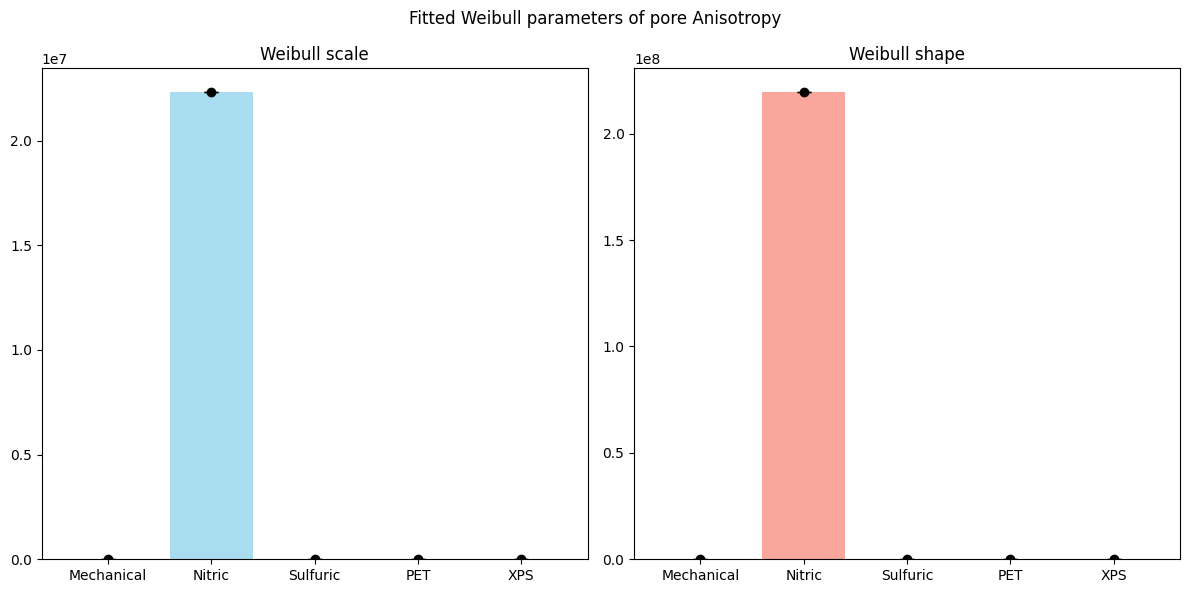

In [176]:
# Split the elements within each array
first_elements = [arr[0] for arr in anis_ci_list]
second_elements = [arr[1] for arr in anis_ci_list]

# Calculate error values from confidence intervals
errors_shape = [(up - low) / 2 for low, up in first_elements]
errors_scale = [(up - low) / 2 for low, up in second_elements]

data1 = anis_scale_est
data2 = anis_shape_est

# Create a figure with two horizontally arranged subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Subplot 1: Bar plot 1
axs[0].bar(titles, data1, color='skyblue', alpha=0.7)
axs[0].errorbar(titles, data1, yerr=errors_scale, fmt='o', color='black', capsize=5, label='Confidence Interval')
axs[0].set_title('Weibull scale')

# # Optionally, add data labels on top of the bars
# for i, value in enumerate(data1):
#     ax[0].text(i, value, str(round(value,3)), ha='center', va='bottom')

# Subplot 2: Bar plot 2
axs[1].bar(titles, data2, color='salmon', alpha=0.7)
axs[1].errorbar(titles, data2, yerr=errors_shape, fmt='o', color='black', capsize=5, label='Confidence Interval')
axs[1].set_title('Weibull shape')

fig.suptitle('Fitted Weibull parameters of pore Anisotropy')
# Adjust spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

fig.savefig('tannin-foams-anisotropy-bars.tif')

In [177]:
print(data1)
print(errors_scale)
print('x')
print(data2)
print(errors_shape)

[5.84572418e-01 2.23345587e+07 4.88376128e-01 8.91742207e-01
 5.32871426e-01]
[0.006235342885392847, 0.1472391486362865, 0.0031202503894976474, 0.022694871421562457, 0.00952149932537144]
x
[3.49670608e+00 2.19739290e+08 4.50660631e+00 4.72092857e+00
 4.43692851e+00]
[0.08019640849095988, 2.7695010478638067, 0.10736370302695475, 0.3155516348310994, 0.23246500743297283]


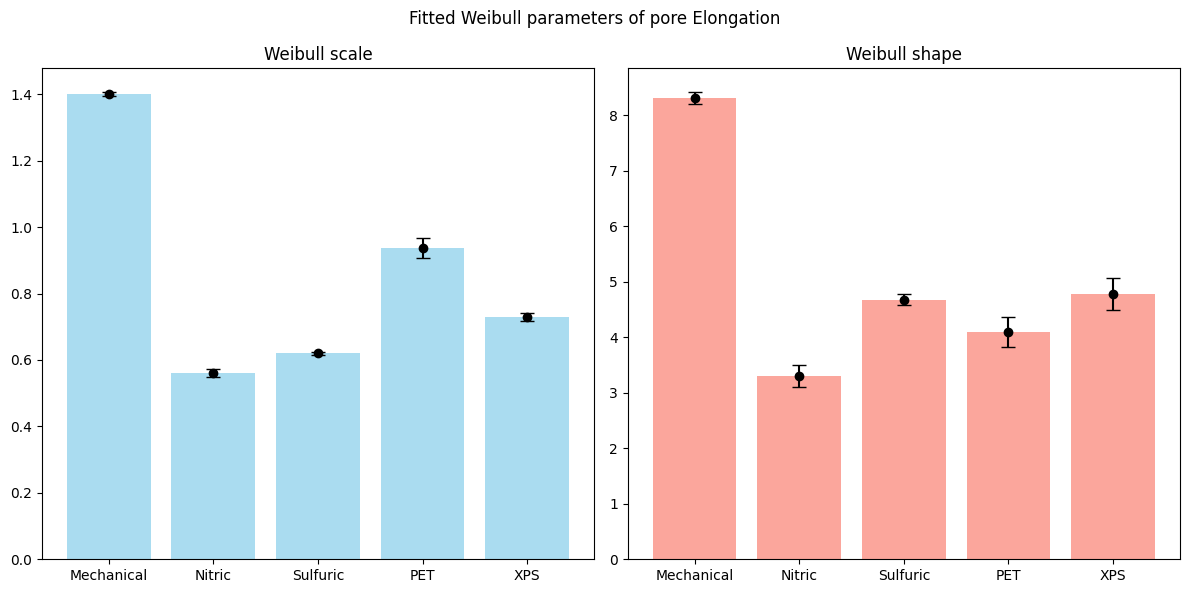

In [178]:
# Split the elements within each array
first_elements = [arr[0] for arr in elong_ci_list]
second_elements = [arr[1] for arr in elong_ci_list]

# Calculate error values from confidence intervals
errors_shape = [(up - low) / 2 for low, up in first_elements]
errors_scale = [(up - low) / 2 for low, up in second_elements]

data1 = elong_scale_est
data2 = elong_shape_est

# Create a figure with two horizontally arranged subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
# Subplot 1: Bar plot 1
axs[0].bar(titles, data1, color='skyblue', alpha=0.7)
axs[0].errorbar(titles, data1, yerr=errors_scale, fmt='o', color='black', capsize=5, label='Confidence Interval')
axs[0].set_title('Weibull scale')

# Subplot 2: Bar plot 2
axs[1].bar(titles, data2, color='salmon', alpha=0.7)
axs[1].errorbar(titles, data2, yerr=errors_shape, fmt='o', color='black', capsize=5, label='Confidence Interval')
axs[1].set_title('Weibull shape')

fig.suptitle('Fitted Weibull parameters of pore Elongation')
# Adjust spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

fig.savefig('tannin-foams-elongation-bars.tif')

In [179]:
print(data1)
print(errors_scale)
print('x')
print(data2)
print(errors_shape)

[1.40053073 0.55983164 0.61980215 0.93691204 0.72937714]
[0.007032083670422462, 0.012025724541685046, 0.0036763615741985944, 0.029550428277780927, 0.010698386485532785]
x
[8.32043464 3.31095923 4.68226983 4.10077457 4.78741726]
[0.10823111867764768, 0.19665938033641206, 0.09720656337630729, 0.2703339400938318, 0.2893819824406263]


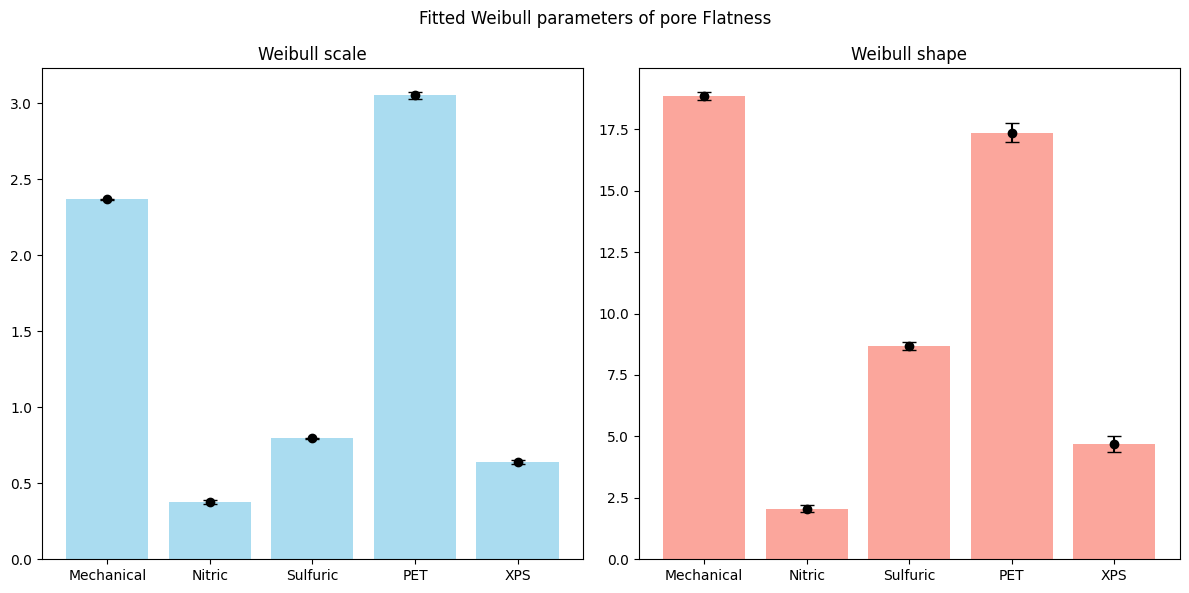

In [180]:
# Split the elements within each array
first_elements = [arr[0] for arr in flatn_ci_list]
second_elements = [arr[1] for arr in flatn_ci_list]

# Calculate error values from confidence intervals
errors_shape = [(up - low) / 2 for low, up in first_elements]
errors_scale = [(up - low) / 2 for low, up in second_elements]

data1 = flatn_scale_est
data2 = flatn_shape_est

# Create a figure with two horizontally arranged subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
# Subplot 1: Bar plot 1
axs[0].bar(titles, data1, color='skyblue', alpha=0.7)
axs[0].errorbar(titles, data1, yerr=errors_scale, fmt='o', color='black', capsize=5, label='Confidence Interval')
axs[0].set_title('Weibull scale')

# Subplot 2: Bar plot 2
axs[1].bar(titles, data2, color='salmon', alpha=0.7)
axs[1].errorbar(titles, data2, yerr=errors_shape, fmt='o', color='black', capsize=5, label='Confidence Interval')
axs[1].set_title('Weibull shape')

fig.suptitle('Fitted Weibull parameters of pore Flatness')
# Adjust spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

fig.savefig('tannin-foams-flatness-bars.tif')

In [181]:
print(data1)
print(errors_scale)
print('x')
print(data2)
print(errors_shape)

[2.36836148 0.3761981  0.79711771 3.05355812 0.64201242]
[0.004013220334456391, 0.012213553884897255, 0.0025441635754077097, 0.023034744239606164, 0.012550603065612342]
x
[18.86221334  2.06327065  8.68237176 17.36129198  4.70260534]
[0.1627185508168183, 0.14945654421243026, 0.16386402935557154, 0.4000808260302786, 0.32010307238444247]


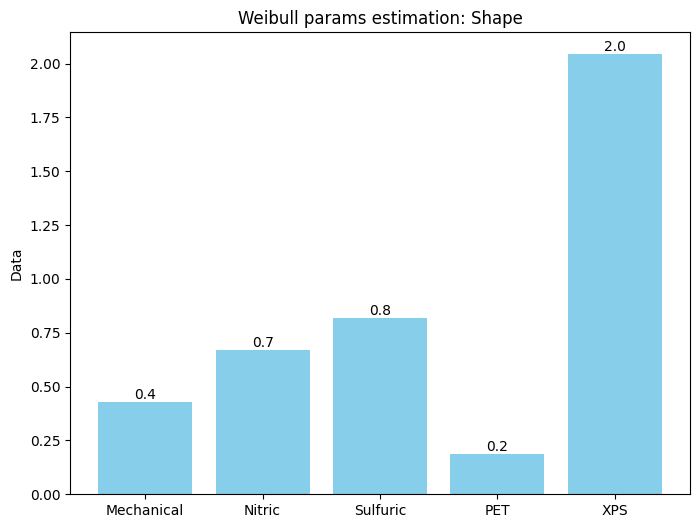

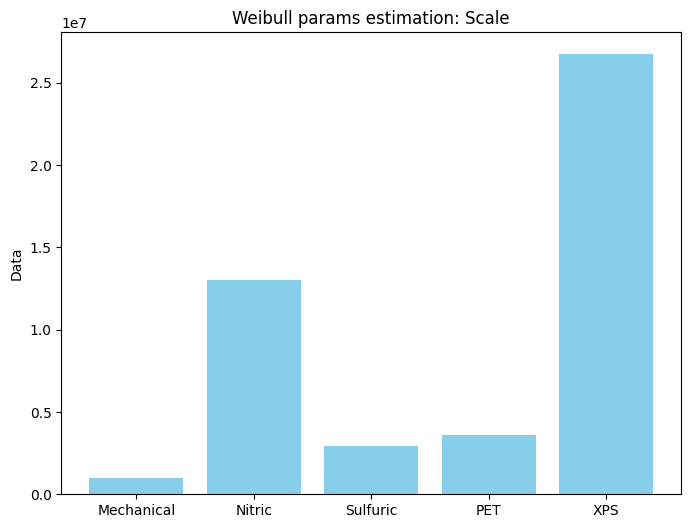

In [182]:
data = volume_shape_est
# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(titles, data, color='skyblue')
plt.ylabel('Data')
plt.title('Weibull params estimation: Shape');

# Optionally, add data labels on top of the bars
for i, value in enumerate(data):
    plt.text(i, value, str(round(value,1)), ha='center', va='bottom')

data = volume_scale_est
# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(titles, data, color='skyblue')
plt.ylabel('Data')
plt.title('Weibull params estimation: Scale');



## Old Histogram Distributions

### Pore Volumes histograms

In [183]:
mechanical = pd.read_csv('Mechanical_FiltAnalysis.csv')#,sep = ';')
nitric = pd.read_csv('Nitric_FiltAnalysis.csv')
sulfuric = pd.read_csv('Sulfuric_FiltAnalysis.csv')
green = pd.read_csv('Green_FiltAnalysis.csv')
pink = pd.read_csv('Pink_FiltAnalysis.csv')

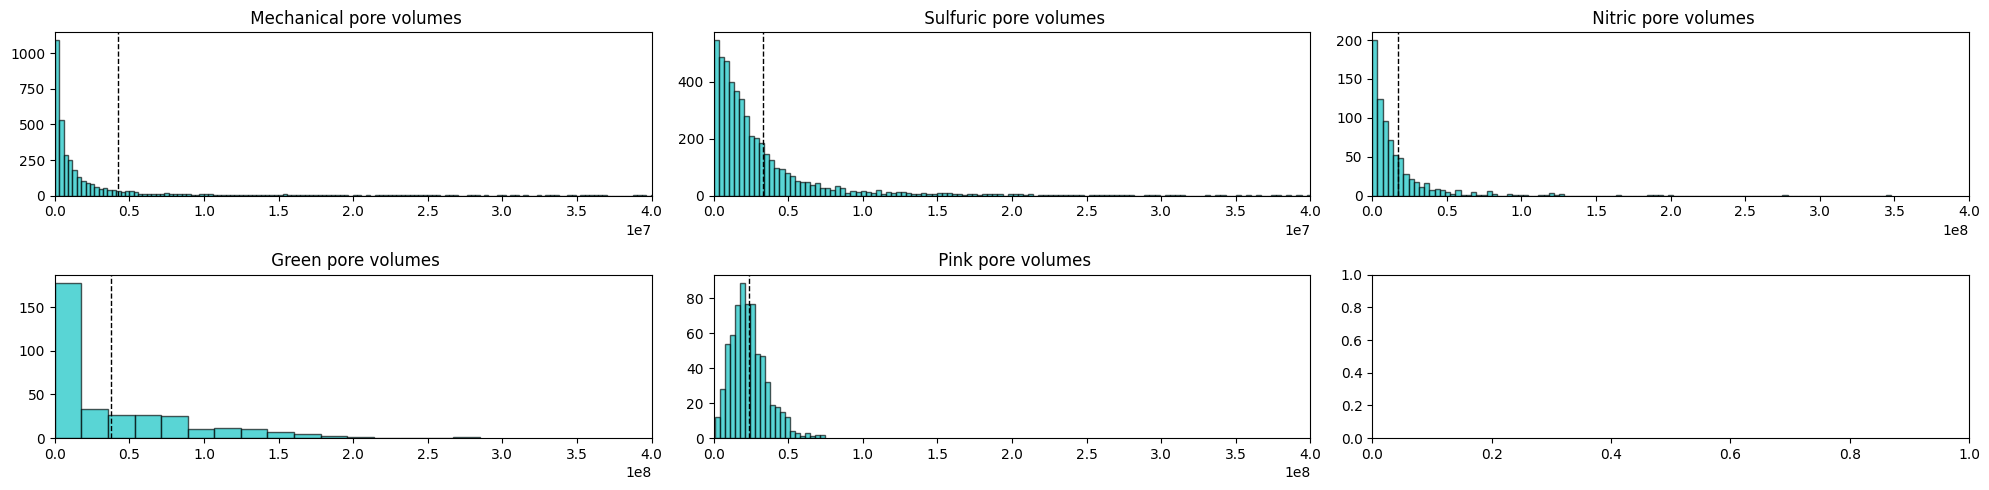

In [184]:
fig, ax = plt.subplots(figsize = (20,5), nrows=2, ncols =3, tight_layout=True) # sharey=True, sharex = True,
#fig.tight_layout()
ax[0][0].hist(mechanical['Volume3d'], bins = 'auto',color='c', edgecolor='k', alpha=0.65)
ax[0][0].axvline(mechanical['Volume3d'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][0].set_xlim(0.0, 4e7)
ax[0][0].set_title(' Mechanical pore volumes')
ax[0][1].hist(sulfuric['Volume3d'], bins = 'auto',color='c', edgecolor='k', alpha=0.65)
ax[0][1].axvline(sulfuric['Volume3d'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][1].set_xlim(0.0, 4e7)
ax[0][1].set_title(' Sulfuric pore volumes')
ax[0][2].hist(nitric['Volume3d'], bins = 'auto',color='c', edgecolor='k', alpha=0.65)
ax[0][2].axvline(nitric['Volume3d'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][2].set_title(' Nitric pore volumes')
ax[0][2].set_xlim(0.0, 4e8)
ax[1][0].hist(green['Volume3d'], bins = 'auto',color='c', edgecolor='k', alpha=0.65)
ax[1][0].axvline(green['Volume3d'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1][0].set_xlim(0.0, 4e8)
ax[1][0].set_title(' Green pore volumes')
ax[1][1].hist(pink['Volume3d'], bins = 'auto',color='c', edgecolor='k', alpha=0.65)
ax[1][1].axvline(pink['Volume3d'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1][1].set_xlim(0.0, 4e8)
ax[1][1].set_title(' Pink pore volumes');

#plt.xlabel("voxels [um3]")
plt.savefig('volume3d_distribution.jpg');

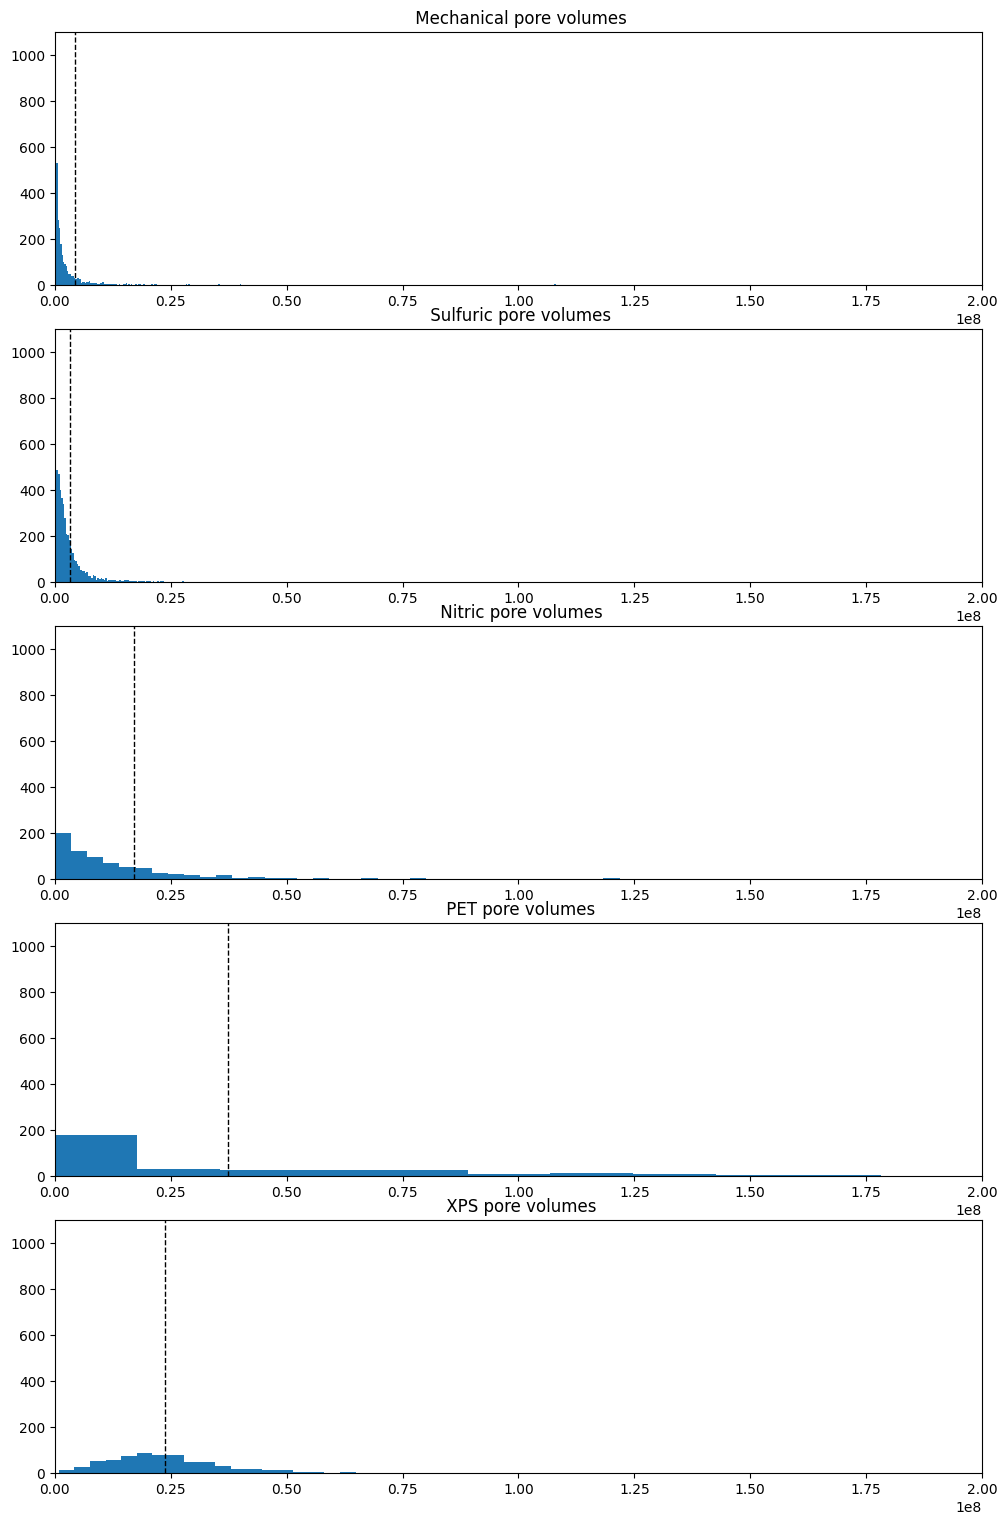

In [185]:
fig, ax = plt.subplots(figsize = (10,15), nrows=5, ncols =1)#, tight_layout=True) # sharey=True, sharex = True,
fig.tight_layout()
ax[0].hist(mechanical['Volume3d'], bins = 'auto')
ax[0].axvline(mechanical['Volume3d'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0].set_xlim(0.0, 2e8)
ax[0].set_ylim(0.0, 1100)
ax[0].set_title(' Mechanical pore volumes')
ax[1].hist(sulfuric['Volume3d'], bins = 'auto')
ax[1].axvline(sulfuric['Volume3d'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1].set_xlim(0.0, 2e8)
ax[1].set_ylim(0.0, 1100)
ax[1].set_title(' Sulfuric pore volumes')
ax[2].hist(nitric['Volume3d'], bins = 'auto')
ax[2].axvline(nitric['Volume3d'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2].set_title(' Nitric pore volumes')
ax[2].set_xlim(0.0, 2e8)
ax[2].set_ylim(0.0, 1100)
ax[3].hist(green['Volume3d'], bins = 'auto')
ax[3].axvline(green['Volume3d'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[3].set_xlim(0.0, 2e8)
ax[3].set_ylim(0.0, 1100)
ax[3].set_title(' PET pore volumes')
ax[4].hist(pink['Volume3d'], bins = 'auto')
ax[4].axvline(pink['Volume3d'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[4].set_xlim(0.0, 2e8)
ax[4].set_ylim(0.0, 1100)
ax[4].set_title(' XPS pore volumes');

#plt.xlabel("voxels [um3]")
plt.savefig('volume3d_distribution_2.jpg');

### Pore Equivalent Diameter histograms

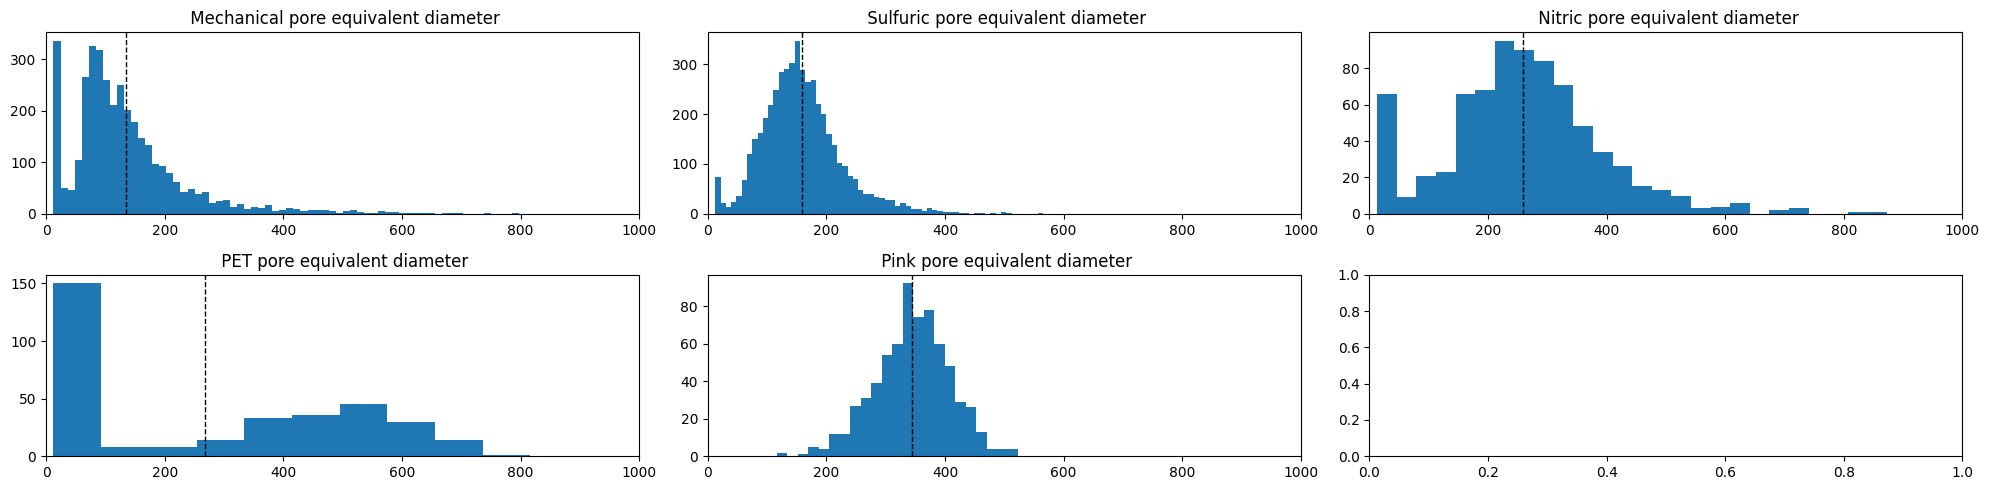

In [186]:
fig, ax = plt.subplots(figsize = (20,5), nrows=2, ncols =3, tight_layout=True) #  sharey=True, ,
ax[0][0].hist(mechanical['EqDiameter'], bins = 'auto')
ax[0][0].axvline(mechanical['EqDiameter'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][0].set_title(' Mechanical pore equivalent diameter')
ax[0][0].set_xlim(0.0, 1000)
ax[0][1].hist(sulfuric['EqDiameter'], bins = 'auto')
ax[0][1].axvline(sulfuric['EqDiameter'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][1].set_title(' Sulfuric pore equivalent diameter')
ax[0][1].set_xlim(0.0, 1000)
ax[0][2].hist(nitric['EqDiameter'], bins = 'auto')
ax[0][2].axvline(nitric['EqDiameter'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][2].set_xlim(0.0, 1000)
ax[0][2].set_title(' Nitric pore equivalent diameter')
ax[1][0].hist(green['EqDiameter'], bins = 'auto')
ax[1][0].axvline(green['EqDiameter'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1][0].set_xlim(0.0, 1000)
ax[1][0].set_title(' PET pore equivalent diameter')
ax[1][1].hist(pink['EqDiameter'], bins = 'auto')
ax[1][1].set_xlim(0.0, 1000)
ax[1][1].axvline(pink['EqDiameter'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1][1].set_title(' Pink pore equivalent diameter');
plt.savefig('eqDiameter_distribution.jpg');

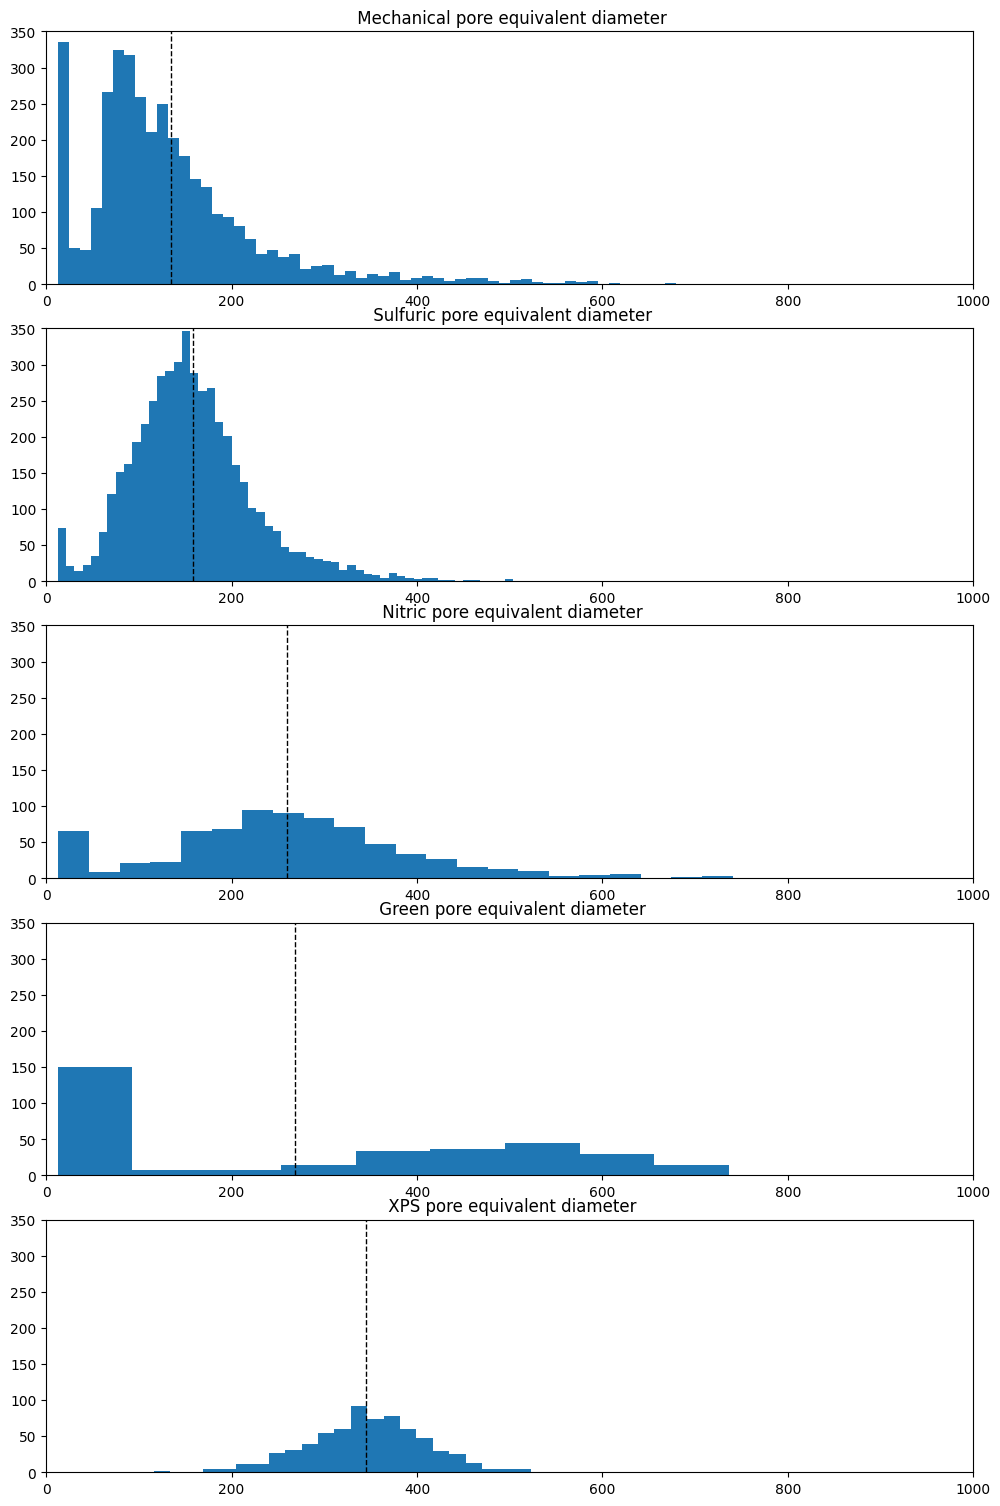

In [187]:
fig, ax = plt.subplots(figsize = (10,15), nrows=5, ncols =1)#, tight_layout=True) # sharey=True, sharex = True,
fig.tight_layout()
ax[0].hist(mechanical['EqDiameter'], bins = 'auto')
ax[0].axvline(mechanical['EqDiameter'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0].set_title(' Mechanical pore equivalent diameter')
ax[0].set_xlim(0.0, 1000)
ax[0].set_ylim(0.0, 350)
ax[1].hist(sulfuric['EqDiameter'], bins = 'auto')
ax[1].axvline(sulfuric['EqDiameter'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1].set_title(' Sulfuric pore equivalent diameter')
ax[1].set_xlim(0.0, 1000)
ax[1].set_ylim(0.0, 350)
ax[2].hist(nitric['EqDiameter'], bins = 'auto')
ax[2].axvline(nitric['EqDiameter'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2].set_xlim(0.0, 1000)
ax[2].set_ylim(0.0, 350)
ax[2].set_title(' Nitric pore equivalent diameter')
ax[3].hist(green['EqDiameter'], bins = 'auto')
ax[3].axvline(green['EqDiameter'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[3].set_xlim(0.0, 1000)
ax[3].set_ylim(0.0, 350)
ax[3].set_title(' Green pore equivalent diameter')
ax[4].hist(pink['EqDiameter'], bins = 'auto')
ax[4].set_xlim(0.0, 1000)
ax[4].set_ylim(0.0, 350)
ax[4].axvline(pink['EqDiameter'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[4].set_title(' XPS pore equivalent diameter');
plt.savefig('eqDiameter_distribution_2.jpg');


### Pore surface area histograms

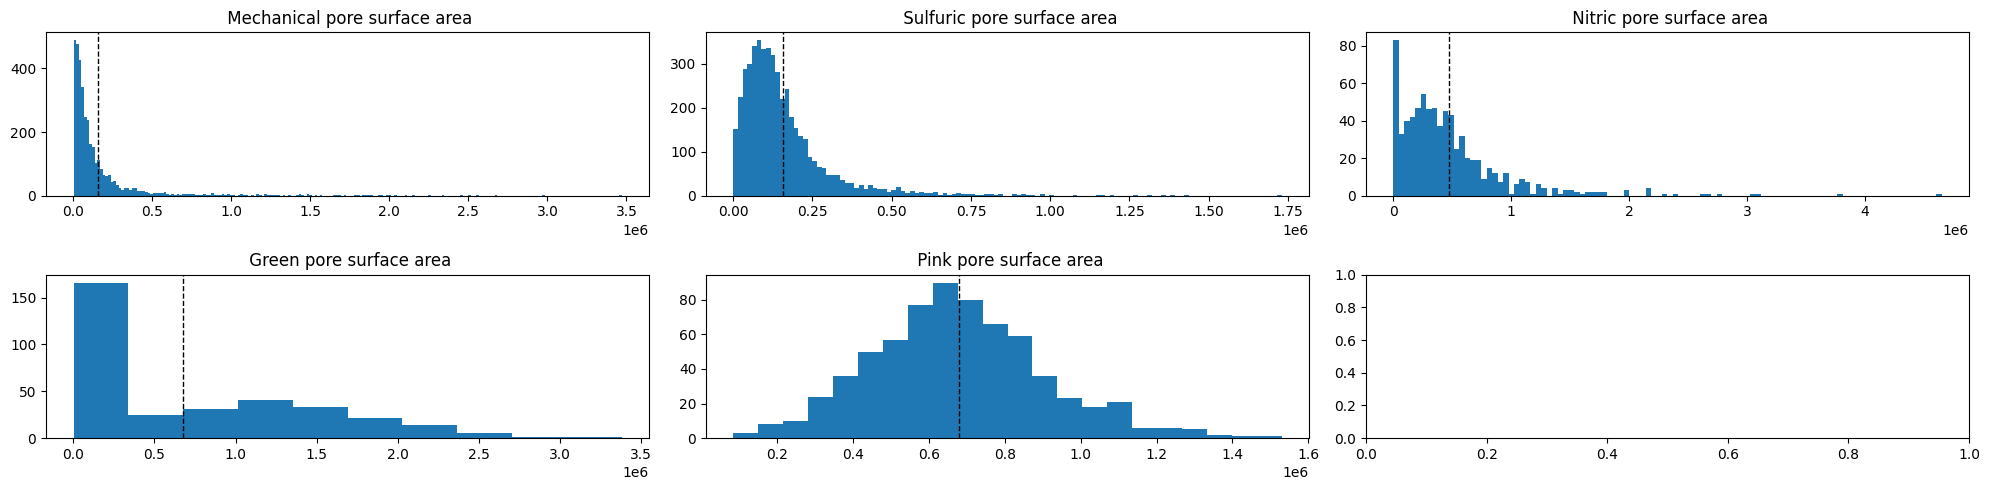

In [188]:
fig, ax = plt.subplots(figsize = (20,5), nrows=2, ncols =3 ,tight_layout=True) #  sharey=True,
ax[0][0].hist(mechanical['VoxelFaceArea'], bins = 'auto')
ax[0][0].axvline(mechanical['VoxelFaceArea'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][0].set_title(' Mechanical pore surface area')
ax[0][1].hist(sulfuric['VoxelFaceArea'], bins = 'auto')
ax[0][1].axvline(sulfuric['VoxelFaceArea'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][1].set_title(' Sulfuric pore surface area')
ax[0][2].hist(nitric['VoxelFaceArea'], bins = 100)
ax[0][2].axvline(nitric['VoxelFaceArea'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][2].set_title(' Nitric pore surface area')
ax[1][0].hist(green['VoxelFaceArea'], bins = 'auto')
ax[1][0].axvline(green['VoxelFaceArea'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1][0].set_title(' Green pore surface area')
ax[1][1].hist(pink['VoxelFaceArea'], bins = 'auto')
ax[1][1].axvline(pink['VoxelFaceArea'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1][1].set_title(' Pink pore surface area');
plt.savefig('surfaceArea_distribution.jpg');

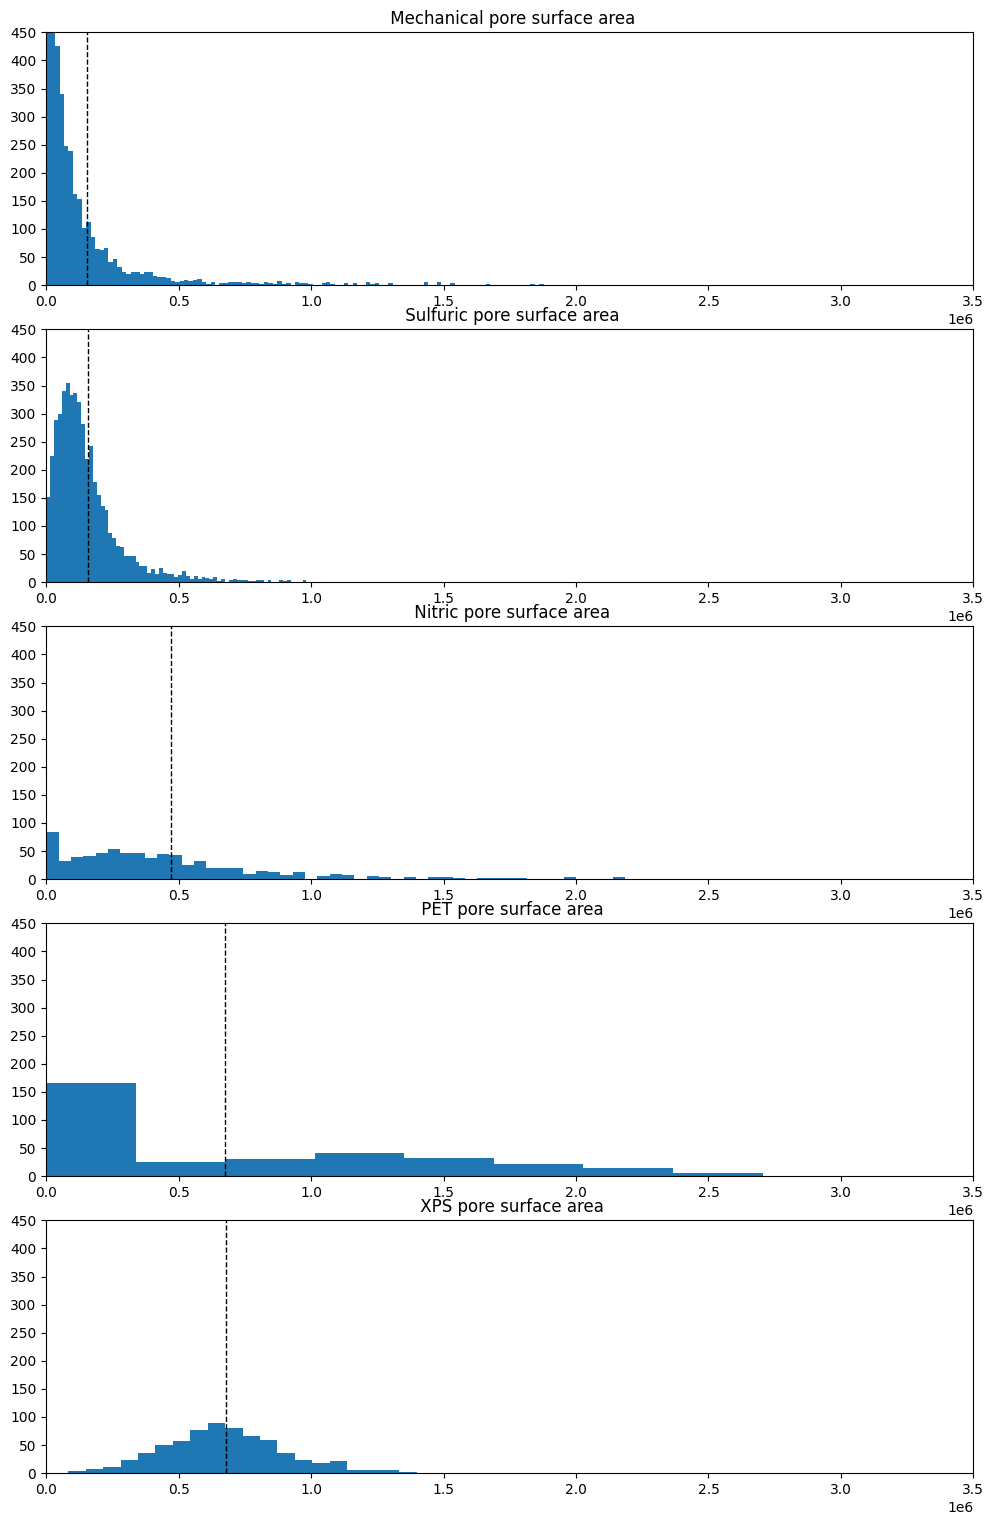

In [189]:
fig, ax = plt.subplots(figsize = (10,15), nrows=5, ncols =1)#, tight_layout=True) # sharey=True, sharex = True,
fig.tight_layout()
ax[0].hist(mechanical['VoxelFaceArea'], bins = 'auto')
ax[0].axvline(mechanical['VoxelFaceArea'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0].set_xlim(0.0, 3.5e6)
ax[0].set_ylim(0.0, 450)
ax[0].set_title(' Mechanical pore surface area')
ax[1].hist(sulfuric['VoxelFaceArea'], bins = 'auto')
ax[1].axvline(sulfuric['VoxelFaceArea'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1].set_title(' Sulfuric pore surface area')
ax[1].set_xlim(0.0, 3.5e6)
ax[1].set_ylim(0.0, 450)
ax[2].hist(nitric['VoxelFaceArea'], bins = 100)
ax[2].axvline(nitric['VoxelFaceArea'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2].set_title(' Nitric pore surface area')
ax[2].set_xlim(0.0, 3.5e6)
ax[2].set_ylim(0.0, 450)
ax[3].hist(green['VoxelFaceArea'], bins = 'auto')
ax[3].axvline(green['VoxelFaceArea'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[3].set_title(' PET pore surface area')
ax[3].set_xlim(0.0, 3.5e6)
ax[3].set_ylim(0.0, 450)
ax[4].hist(pink['VoxelFaceArea'], bins = 'auto')
ax[4].axvline(pink['VoxelFaceArea'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[4].set_title(' XPS pore surface area');
ax[4].set_xlim(0.0, 3.5e6)
ax[4].set_ylim(0.0, 450)
plt.savefig('surfaceArea_distribution_2.jpg');

### Pore Anisotropy, Elongation and Flatness histograms

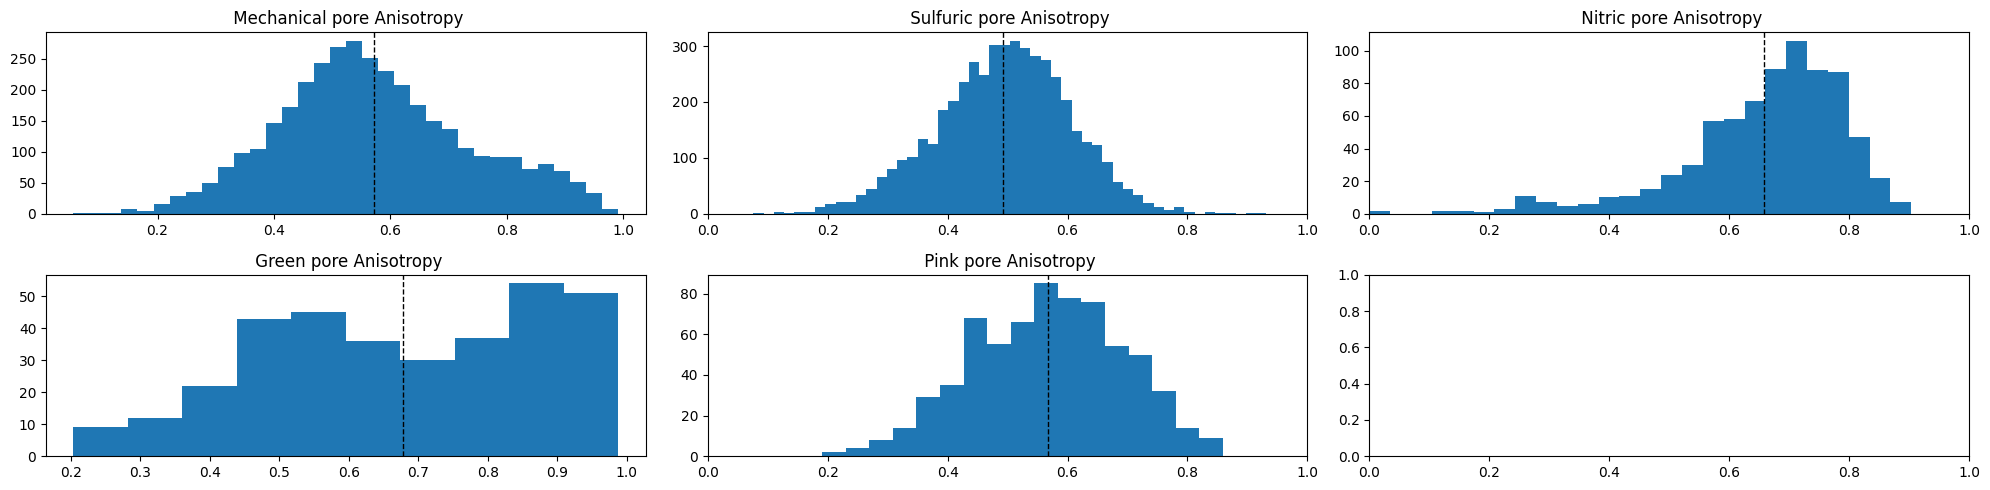

In [190]:
fig, ax = plt.subplots(figsize = (20,5), nrows=2, ncols =3,tight_layout=True) #  sharey=True, 
ax[0][0].hist(mechanical['Anisotropy'], bins = 'auto')
ax[0][0].axvline(mechanical['Anisotropy'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][0].set_title(' Mechanical pore Anisotropy')
ax[0][1].hist(sulfuric['Anisotropy'], bins = 'auto')
ax[0][1].axvline(sulfuric['Anisotropy'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][1].set_xlim(0.0, 1.0)
ax[0][1].set_title(' Sulfuric pore Anisotropy')
ax[0][2].hist(nitric['Anisotropy'], bins = 'auto')
ax[0][2].axvline(nitric['Anisotropy'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][2].set_xlim(0.0, 1.0)
ax[0][2].set_title(' Nitric pore Anisotropy')
ax[1][0].hist(green['Anisotropy'], bins = 'auto')
ax[1][0].axvline(green['Anisotropy'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1][0].set_title(' Green pore Anisotropy')
ax[1][1].hist(pink['Anisotropy'], bins = 'auto')
ax[1][1].set_xlim(0.0, 1.0)
ax[1][1].axvline(pink['Anisotropy'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1][1].set_title(' Pink pore Anisotropy');
plt.savefig('Anisotropy_distribution.jpg');

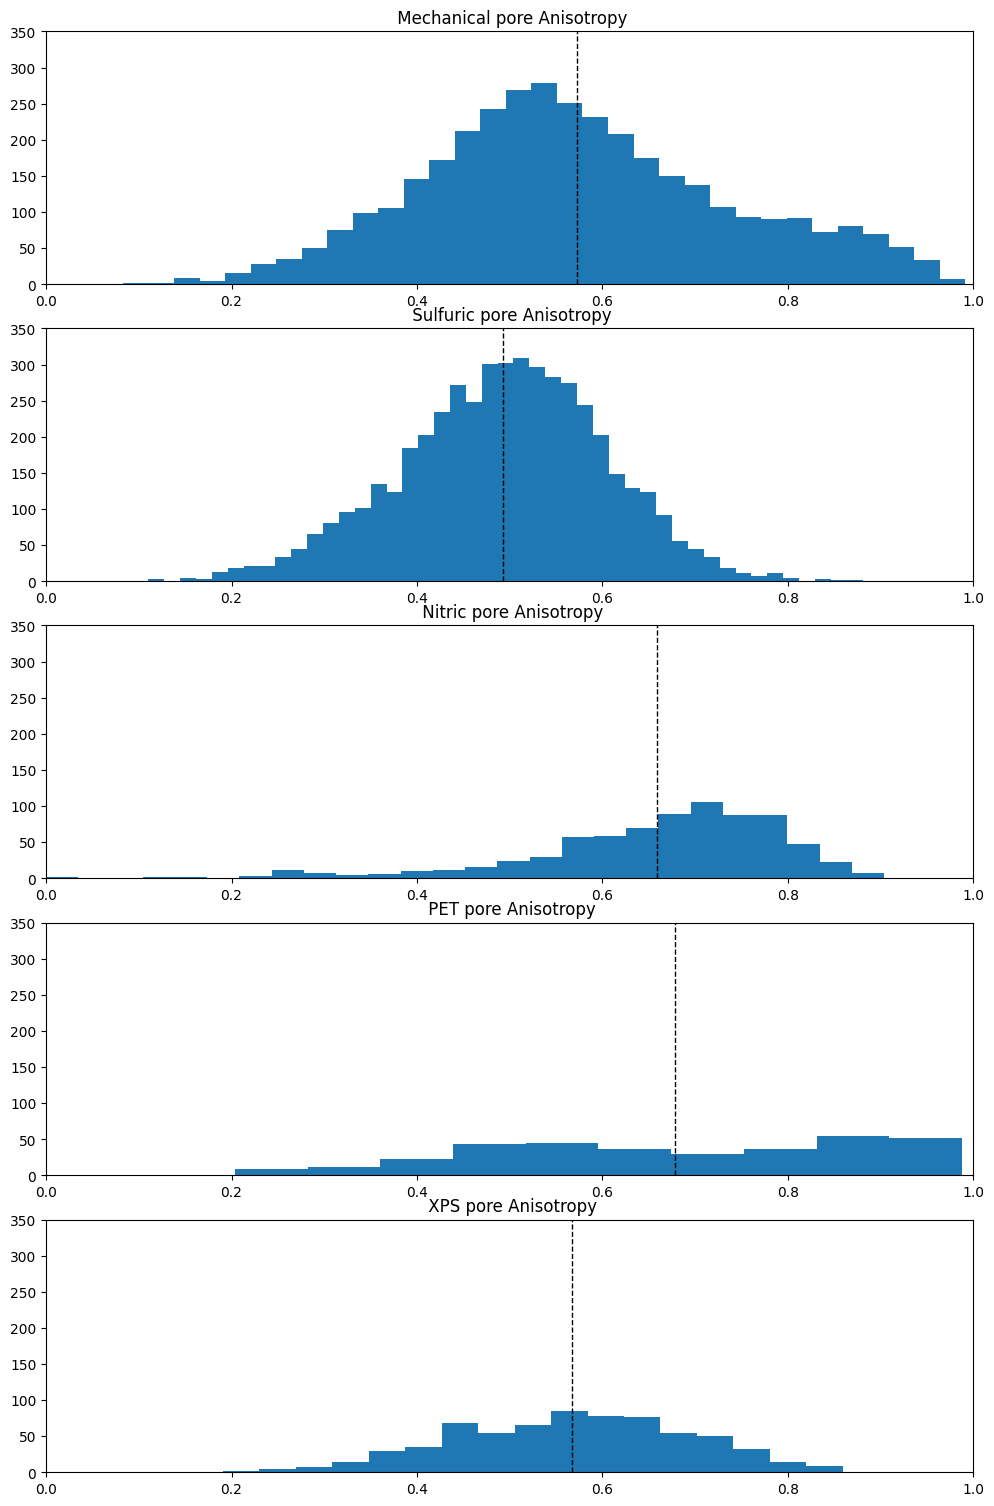

In [191]:
fig, ax = plt.subplots(figsize = (10,15), nrows=5, ncols =1)#, tight_layout=True) # sharey=True, sharex = True,
fig.tight_layout()
ax[0].hist(mechanical['Anisotropy'], bins = 'auto')
ax[0].axvline(mechanical['Anisotropy'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0].set_title(' Mechanical pore Anisotropy')
ax[0].set_xlim(0.0, 1.0)
ax[0].set_ylim(0.0, 350)
ax[1].hist(sulfuric['Anisotropy'], bins = 'auto')
ax[1].axvline(sulfuric['Anisotropy'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1].set_xlim(0.0, 1.0)
ax[1].set_ylim(0.0, 350)
ax[1].set_title(' Sulfuric pore Anisotropy')
ax[2].hist(nitric['Anisotropy'], bins = 'auto')
ax[2].axvline(nitric['Anisotropy'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2].set_xlim(0.0, 1.0)
ax[2].set_ylim(0.0, 350)
ax[2].set_title(' Nitric pore Anisotropy')
ax[3].hist(green['Anisotropy'], bins = 'auto')
ax[3].axvline(green['Anisotropy'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[3].set_title(' PET pore Anisotropy')
ax[3].set_xlim(0.0, 1.0)
ax[3].set_ylim(0.0, 350)
ax[4].hist(pink['Anisotropy'], bins = 'auto')
ax[4].set_xlim(0.0, 1.0)
ax[4].set_ylim(0.0, 350)
ax[4].axvline(pink['Anisotropy'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[4].set_title(' XPS pore Anisotropy');
plt.savefig('Anisotropy_distribution_2.jpg');

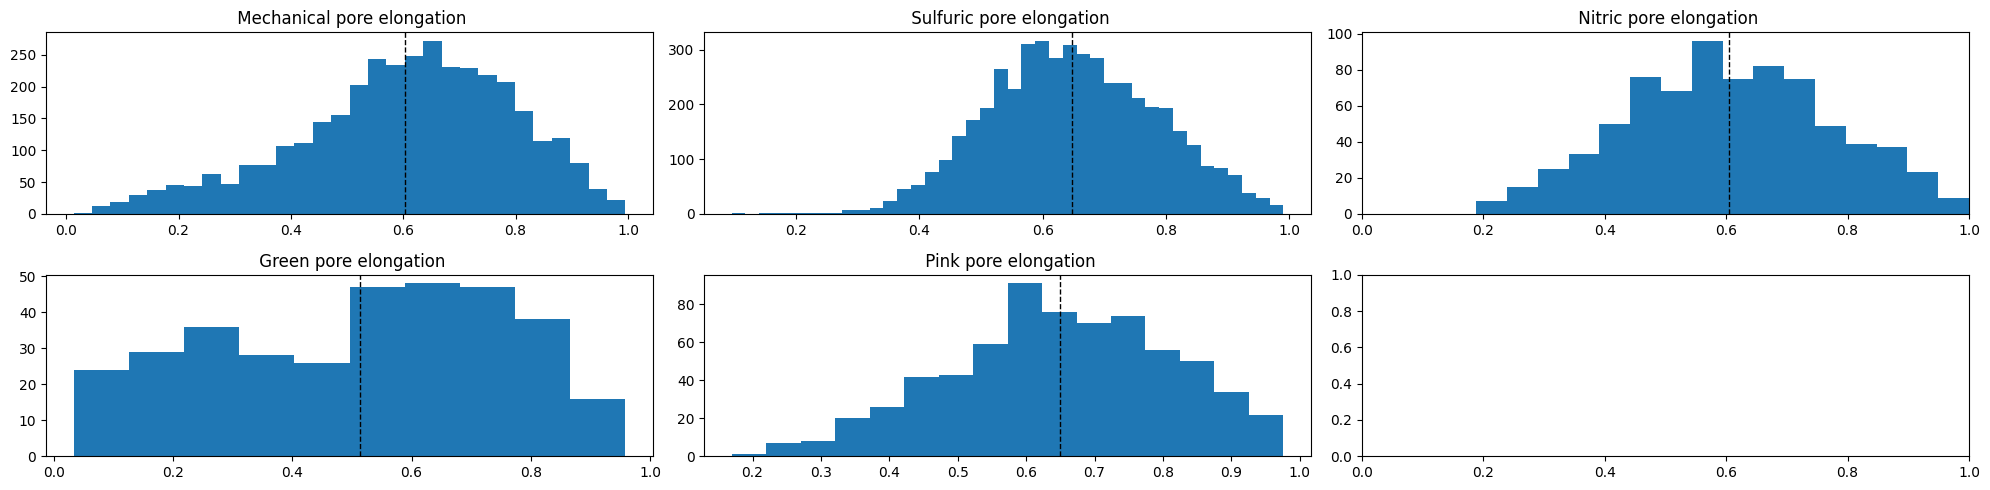

In [192]:
fig, ax = plt.subplots(figsize = (20,5), nrows=2, ncols =3,tight_layout=True) #  sharey=True, ,tight_layout=True
ax[0][0].hist(mechanical['Elongation'], bins = 'auto')
ax[0][0].axvline(mechanical['Elongation'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][0].set_title(' Mechanical pore elongation')
ax[0][1].hist(sulfuric['Elongation'], bins = 'auto')
ax[0][1].axvline(sulfuric['Elongation'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][1].set_title(' Sulfuric pore elongation')
ax[0][2].hist(nitric['Elongation'], bins = 'auto')
ax[0][2].axvline(nitric['Elongation'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][2].set_title(' Nitric pore elongation')
ax[0][2].set_xlim(0.0, 1.0)
ax[1][0].hist(green['Elongation'], bins = 'auto')
ax[1][0].axvline(green['Elongation'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1][0].set_title(' Green pore elongation')
ax[1][1].hist(pink['Elongation'], bins = 'auto')
ax[1][1].axvline(pink['Elongation'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1][1].set_title(' Pink pore elongation');
plt.savefig('Elongation_distribution.jpg');

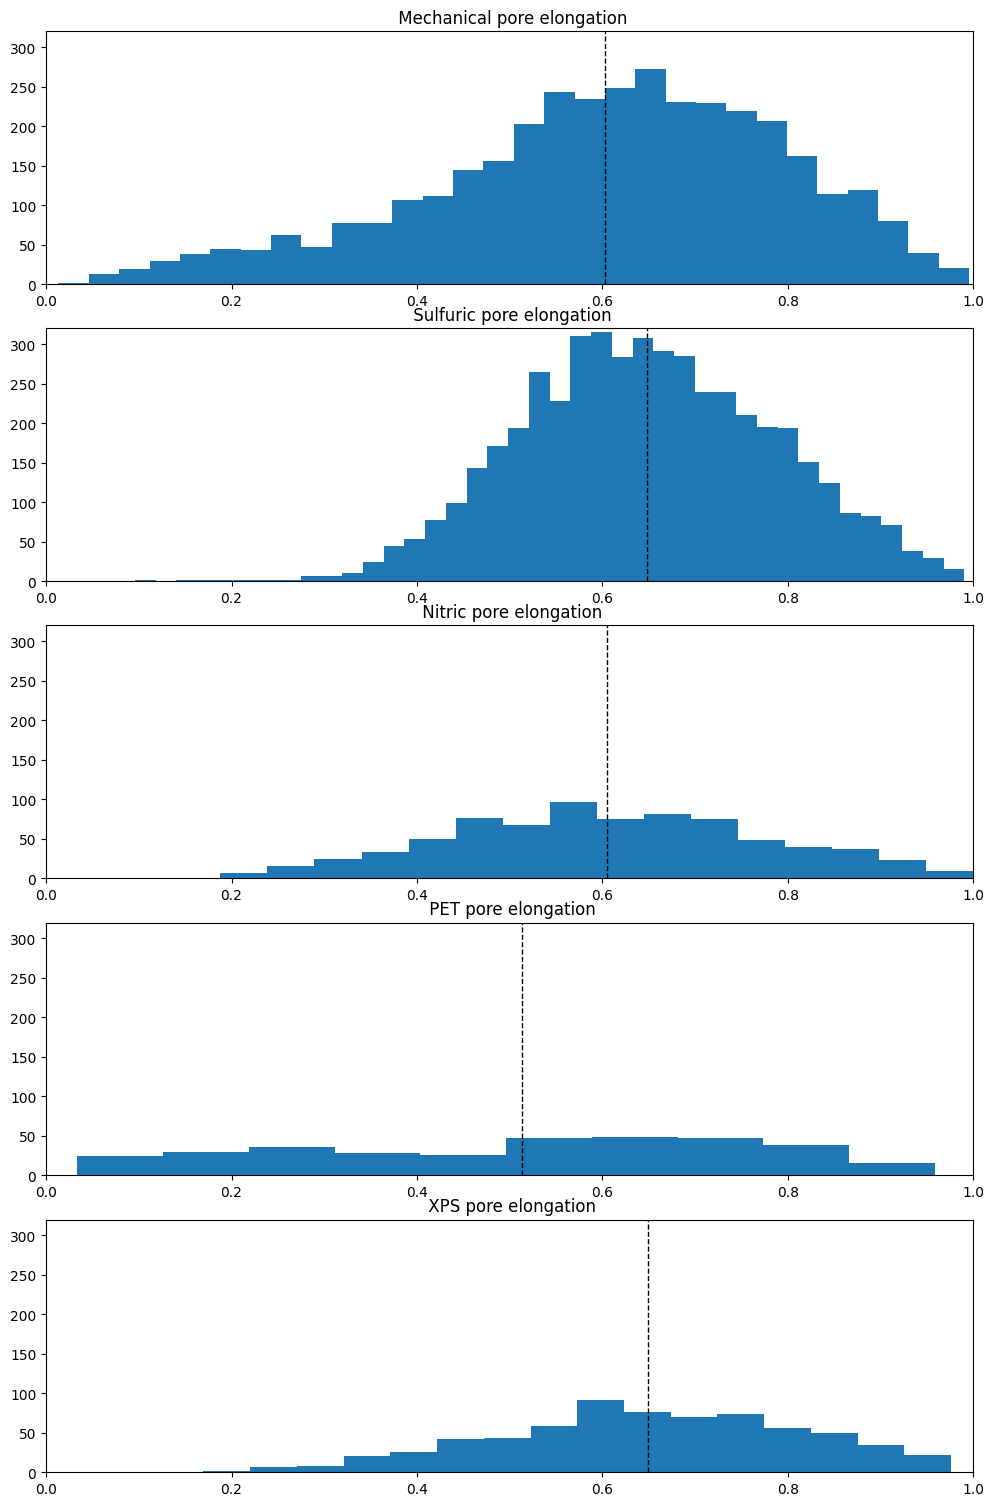

In [193]:
fig, ax = plt.subplots(figsize = (10,15), nrows=5, ncols =1)#, tight_layout=True) # sharey=True, sharex = True,
fig.tight_layout()
ax[0].hist(mechanical['Elongation'], bins = 'auto')
ax[0].axvline(mechanical['Elongation'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0].set_title(' Mechanical pore elongation')
ax[0].set_xlim(0.0, 1.0)
ax[0].set_ylim(0.0, 320)
ax[1].hist(sulfuric['Elongation'], bins = 'auto')
ax[1].axvline(sulfuric['Elongation'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1].set_title(' Sulfuric pore elongation')
ax[1].set_xlim(0.0, 1.0)
ax[1].set_ylim(0.0, 320)
ax[2].hist(nitric['Elongation'], bins = 'auto')
ax[2].axvline(nitric['Elongation'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2].set_title(' Nitric pore elongation')
ax[2].set_xlim(0.0, 1.0)
ax[2].set_ylim(0.0, 320)
ax[3].hist(green['Elongation'], bins = 'auto')
ax[3].axvline(green['Elongation'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[3].set_title(' PET pore elongation')
ax[3].set_xlim(0.0, 1.0)
ax[3].set_ylim(0.0, 320)
ax[4].hist(pink['Elongation'], bins = 'auto')
ax[4].axvline(pink['Elongation'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[4].set_title(' XPS pore elongation');
ax[4].set_xlim(0.0, 1.0)
ax[4].set_ylim(0.0, 320)
plt.savefig('Elongation_distribution_2.jpg');

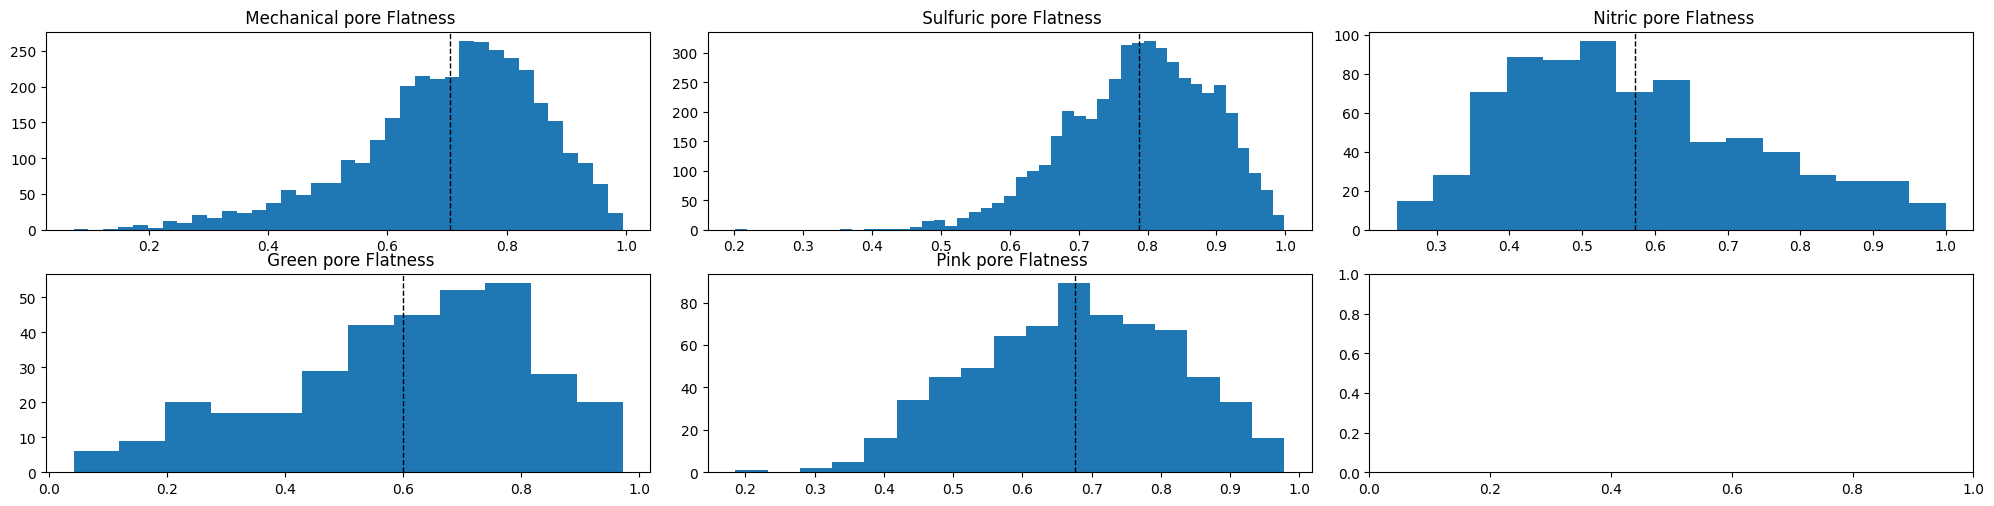

In [194]:
fig, ax = plt.subplots(figsize = (20,5), nrows=2, ncols =3,tight_layout=True) #  sharey=True, ,tight_layout=True
fig.tight_layout()
ax[0][0].hist(mechanical['Flatness'], bins = 'auto')
ax[0][0].axvline(mechanical['Flatness'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][0].set_title(' Mechanical pore Flatness')
ax[0][1].hist(sulfuric['Flatness'], bins = 'auto')
ax[0][1].axvline(sulfuric['Flatness'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][1].set_title(' Sulfuric pore Flatness')
ax[0][2].hist(nitric['Flatness'], bins = 'auto')
ax[0][2].axvline(nitric['Flatness'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0][2].set_title(' Nitric pore Flatness')
ax[1][0].hist(green['Flatness'], bins = 'auto')
ax[1][0].axvline(green['Flatness'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1][0].set_title(' Green pore Flatness')
ax[1][1].hist(pink['Flatness'], bins = 'auto')
ax[1][1].axvline(pink['Flatness'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1][1].set_title(' Pink pore Flatness');
plt.savefig('flatness_distribution.jpg');

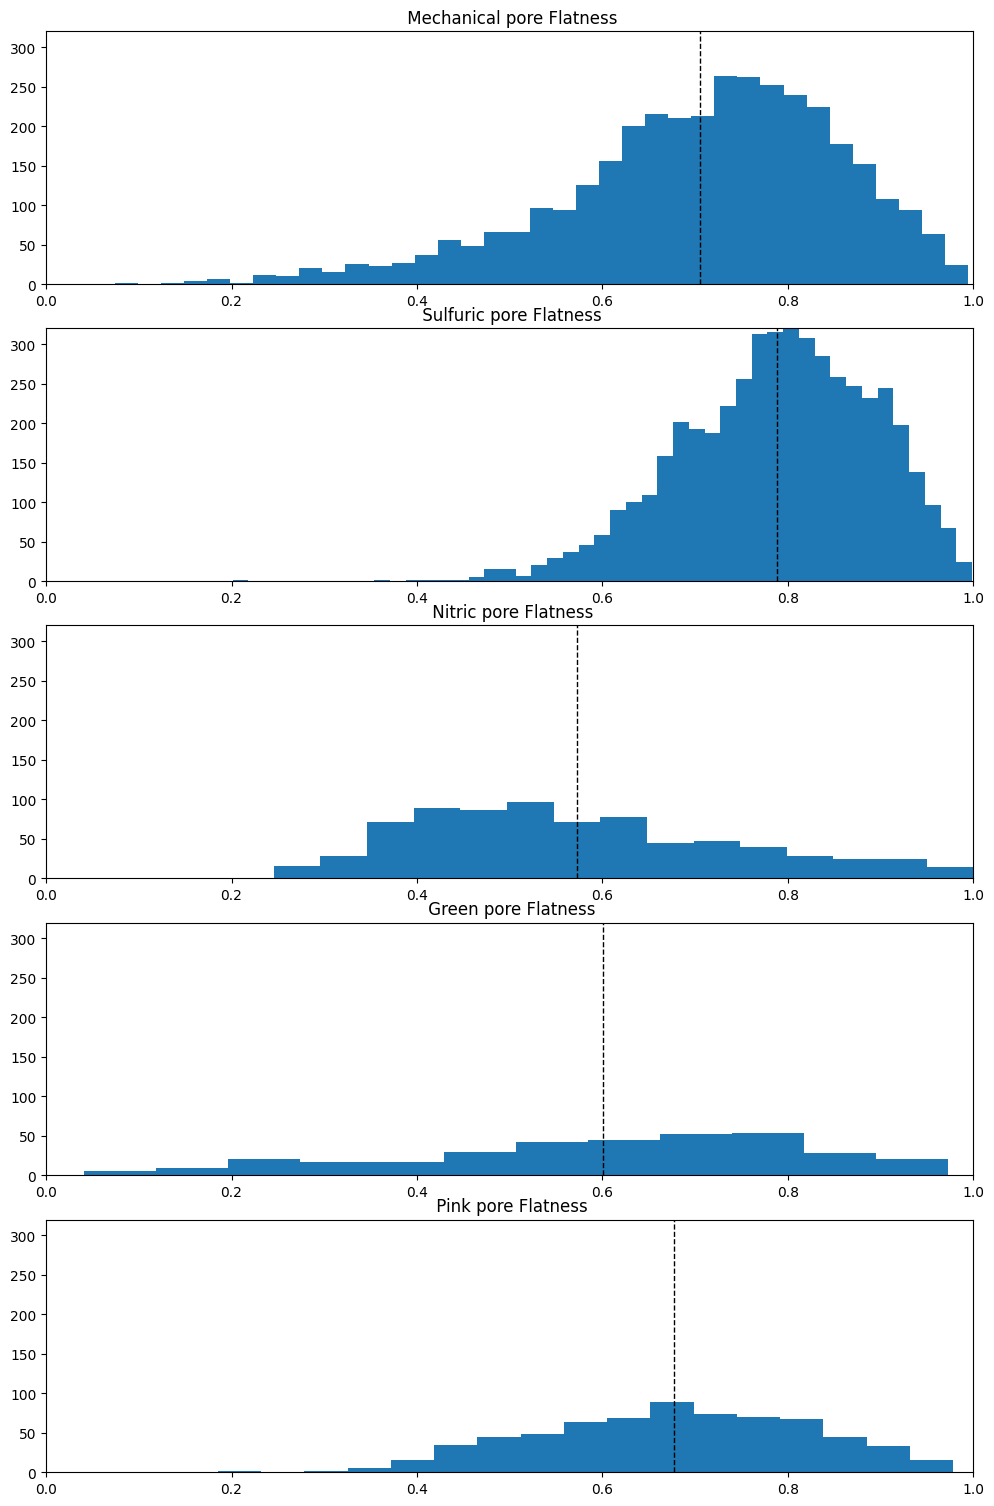

In [195]:
fig, ax = plt.subplots(figsize = (10,15), nrows=5, ncols =1)#, tight_layout=True) # sharey=True, sharex = True,
fig.tight_layout()
ax[0].hist(mechanical['Flatness'], bins = 'auto')
ax[0].axvline(mechanical['Flatness'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0].set_title(' Mechanical pore Flatness')
ax[0].set_xlim(0.0, 1.0)
ax[0].set_ylim(0.0, 320)
ax[1].hist(sulfuric['Flatness'], bins = 'auto')
ax[1].axvline(sulfuric['Flatness'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1].set_title(' Sulfuric pore Flatness')
ax[1].set_xlim(0.0, 1.0)
ax[1].set_ylim(0.0, 320)
ax[2].hist(nitric['Flatness'], bins = 'auto')
ax[2].axvline(nitric['Flatness'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2].set_title(' Nitric pore Flatness')
ax[2].set_xlim(0.0, 1.0)
ax[2].set_ylim(0.0, 320)
ax[3].hist(green['Flatness'], bins = 'auto')
ax[3].axvline(green['Flatness'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[3].set_title(' Green pore Flatness')
ax[3].set_xlim(0.0, 1.0)
ax[3].set_ylim(0.0, 320)
ax[4].hist(pink['Flatness'], bins = 'auto')
ax[4].axvline(pink['Flatness'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[4].set_title(' Pink pore Flatness');
ax[4].set_xlim(0.0, 1.0)
ax[4].set_ylim(0.0, 320)
plt.savefig('flatness_distribution_2.jpg');

Mechanical averages

In [196]:
mechanical_vol3d_avg = mechanical['Volume3d'].mean()
mechanical_vol3d_std = mechanical['Volume3d'].std()
mechanical_surfarea_avg = mechanical['VoxelFaceArea'].mean()
mechanical_surfarea_std = mechanical['VoxelFaceArea'].std()
mechanical_eqDiam_avg = mechanical['EqDiameter'].mean()
mechanical_eqDiam_std = mechanical['EqDiameter'].std()
mechanical_anis_avg = mechanical['Anisotropy'].mean()
mechanical_anis_std = mechanical['Anisotropy'].std()
mechanical_elong_avg = mechanical['Elongation'].mean()
mechanical_elong_std = mechanical['Elongation'].std()
mechanical_flat_avg = mechanical['Flatness'].mean()
mechanical_flat_std = mechanical['Flatness'].std()

print('Mechanical volume: ' + str(mechanical_vol3d_avg) + '+/-' + str(mechanical_vol3d_std) + ' um3')
print('Mechanical surface area: ' + str(mechanical_surfarea_avg) + '+/-' + str(mechanical_surfarea_std)+ ' um2')
print('Mechanical eq diameter: ' + str(mechanical_eqDiam_avg) + '+/-' + str(mechanical_eqDiam_std)+ ' um')
print('Mechanical anisotropy: ' + str(mechanical_anis_avg) + '+/-' + str(mechanical_anis_std))
print('Mechanical elongation: ' + str(mechanical_elong_avg) + '+/-' + str(mechanical_elong_std))
print('Mechanical flatness: ' + str(mechanical_flat_avg) + '+/-' + str(mechanical_flat_std))

Mechanical volume: 4264584.244716352+/-14008006.476716131 um3
Mechanical surface area: 156258.7764182425+/-273811.8241889454 um2
Mechanical eq diameter: 134.47928621421318+/-97.95737773095658 um
Mechanical anisotropy: 0.572279958676307+/-0.1640652385174657
Mechanical elongation: 0.6025105795050056+/-0.19053167467833332
Mechanical flatness: 0.7052237043103449+/-0.1510186342906922


In [197]:
sulfuric_vol3d_avg = sulfuric['Volume3d'].mean()
sulfuric_vol3d_std = sulfuric['Volume3d'].std()
sulfuric_surfarea_avg = sulfuric['VoxelFaceArea'].mean()
sulfuric_surfarea_std = sulfuric['VoxelFaceArea'].std()
sulfuric_eqDiam_avg = sulfuric['EqDiameter'].mean()
sulfuric_eqDiam_std = sulfuric['EqDiameter'].std()
sulfuric_anis_avg = sulfuric['Anisotropy'].mean()
sulfuric_anis_std = sulfuric['Anisotropy'].std()
sulfuric_elong_avg = sulfuric['Elongation'].mean()
sulfuric_elong_std = sulfuric['Elongation'].std()
sulfuric_flat_avg = sulfuric['Flatness'].mean()
sulfuric_flat_std = sulfuric['Flatness'].std()

print('Sulfuric volume: ' + str(sulfuric_vol3d_avg) + '+/-' + str(sulfuric_vol3d_std) + ' um3')
print('Sulfuric surface area: ' + str(sulfuric_surfarea_avg) + '+/-' + str(sulfuric_surfarea_std)+ ' um2')
print('Sulfuric eq diameter: ' + str(sulfuric_eqDiam_avg) + '+/-' + str(sulfuric_eqDiam_std)+ ' um')
print('Sulfuric anisotropy: ' + str(sulfuric_anis_avg) + '+/-' + str(sulfuric_anis_std))
print('Sulfuric elongation: ' + str(sulfuric_elong_avg) + '+/-' + str(sulfuric_elong_std))
print('Sulfuric flatness: ' + str(sulfuric_flat_avg) + '+/-' + str(sulfuric_flat_std))

Sulfuric volume: 3317807.619126819+/-5228987.652793317 um3
Sulfuric surface area: 156500.7767151767+/-142278.03422541107 um2
Sulfuric eq diameter: 158.29057665047222+/-66.53916975726409 um
Sulfuric anisotropy: 0.49298145434511437+/-0.1109046128600931
Sulfuric elongation: 0.6480461716839917+/-0.1347319802698384
Sulfuric flatness: 0.7878588428274429+/-0.1033768075232463


In [198]:
nitric_vol3d_avg = nitric['Volume3d'].mean()
nitric_vol3d_std = nitric['Volume3d'].std()
nitric_surfarea_avg = nitric['VoxelFaceArea'].mean()
nitric_surfarea_std = nitric['VoxelFaceArea'].std()
nitric_eqDiam_avg = nitric['EqDiameter'].mean()
nitric_eqDiam_std = nitric['EqDiameter'].std()
nitric_anis_avg = nitric['Anisotropy'].mean()
nitric_anis_std = nitric['Anisotropy'].std()
nitric_elong_avg = nitric['Elongation'].mean()
nitric_elong_std = nitric['Elongation'].std()
nitric_flat_avg = nitric['Flatness'].mean()
nitric_flat_std = nitric['Flatness'].std()

print('Nitric volume: ' + str(nitric_vol3d_avg) + '+/-' + str(nitric_vol3d_std) + ' um3')
print('Nitric surface area: ' + str(nitric_surfarea_avg) + '+/-' + str(nitric_surfarea_std)+ ' um2')
print('Nitric eq diameter: ' + str(nitric_eqDiam_avg) + '+/-' + str(nitric_eqDiam_std)+ ' um')
print('Nitric anisotropy: ' + str(nitric_anis_avg) + '+/-' + str(nitric_anis_std))
print('Nitric elongation: ' + str(nitric_elong_avg) + '+/-' + str(nitric_elong_std))
print('Nitric flatness: ' + str(nitric_flat_avg) + '+/-' + str(nitric_flat_std))

Nitric volume: 17015906.287220027+/-28564411.916448403 um3
Nitric surface area: 471516.97496706195+/-481418.29795506375 um2
Nitric eq diameter: 259.7479514856383+/-133.08071190437903 um
Nitric anisotropy: 0.6583641488801054+/-0.138785379819238
Nitric elongation: 0.6047121870882741+/-0.1686836257947496
Nitric flatness: 0.5725380105401845+/-0.17006552883609508


In [199]:
green_vol3d_avg = green['Volume3d'].mean()
green_surfarea_avg = green['VoxelFaceArea'].mean()
green_eqDiam_avg = green['EqDiameter'].mean()
green_anis_avg = green['Anisotropy'].mean()
green_elong_avg = green['Elongation'].mean()
green_flat_avg = green['Flatness'].mean()

print('Green volume: ' + str(green_vol3d_avg))
print('Green surface area: ' + str(green_surfarea_avg) )
print('Green eq diameter: ' + str(green_eqDiam_avg) )
print('Green anisotropy: ' + str(green_anis_avg))
print('Green elongation: ' + str(green_elong_avg) )
print('Green flatness: ' + str(green_flat_avg) )

Green volume: 37441502.348082595
Green surface area: 676726.7964601769
Green eq diameter: 268.62353912074803
Green anisotropy: 0.677774563421829
Green elongation: 0.5130769702064897
Green flatness: 0.6001198303834808


In [200]:
pink_vol3d_avg = pink['Volume3d'].mean()
pink_surfarea_avg = pink['VoxelFaceArea'].mean()
pink_eqDiam_avg = pink['EqDiameter'].mean()
pink_anis_avg = pink['Anisotropy'].mean()
pink_elong_avg = pink['Elongation'].mean()
pink_flat_avg = pink['Flatness'].mean()

print('Pink volume: ' + str(pink_vol3d_avg))
print('Pink surface area: ' + str(pink_surfarea_avg) )
print('Pink eq diameter: ' + str(pink_eqDiam_avg) )
print('Pink anisotropy: ' + str(pink_anis_avg))
print('Pink elongation: ' + str(pink_elong_avg) )
print('Pink flatness: ' + str(pink_flat_avg) )

Pink volume: 23657559.835051548
Pink surface area: 678118.2680412371
Pink eq diameter: 345.0850373797071
Pink anisotropy: 0.5670885228276878
Pink elongation: 0.6492102754050074
Pink flatness: 0.6766129823269513


## Basic Statistics on Foams parameters

- Average Volume3d
- Average Eq Diameter

In [201]:
list_samples = ['Mechanical', 'Nitric', 'Sulfuric']

- Average Volume3d

In [202]:
# Volume 3d
basicVolume_mechanical = mechanical['Volume3d'].describe()
#print(basicVolume_mechanical)
basicVolume_nitric = nitric['Volume3d'].describe()
print(basicVolume_nitric)
basicVolume_sulfuric = sulfuric['Volume3d'].describe()
#print(basicVolume_sulfuric)

average_volumes3d = [basicVolume_mechanical['mean'], basicVolume_nitric['mean'], basicVolume_sulfuric['mean']]
std_volumes3d = [basicVolume_mechanical['std'], basicVolume_nitric['std'], basicVolume_sulfuric['std']]

count    7.590000e+02
mean     1.701591e+07
std      2.856441e+07
min      1.216000e+03
25%      3.060000e+06
50%      9.020000e+06
75%      1.900000e+07
max      3.480000e+08
Name: Volume3d, dtype: float64


- Average EqDiameter

In [203]:
basicEqDiameter_mechanical = mechanical['EqDiameter'].describe()
basicEqDiameter_nitric = nitric['EqDiameter'].describe()
print(basicEqDiameter_nitric)
basicEqDiameter_sulfuric = sulfuric['EqDiameter'].describe()

average_eqDiameter = [basicEqDiameter_mechanical['mean'], basicEqDiameter_nitric['mean'], basicEqDiameter_sulfuric['mean']]
std_eqDiameter = [basicEqDiameter_mechanical['std'], basicEqDiameter_nitric['std'], basicEqDiameter_sulfuric['std']]

count    759.000000
mean     259.747951
std      133.080712
min       13.242754
25%      180.125114
50%      258.267230
75%      331.068855
max      872.690417
Name: EqDiameter, dtype: float64
